# DATA CLEANING

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import missingno as msno
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from scipy.stats import zscore
from scipy.stats import median_abs_deviation
from scipy.stats.mstats import winsorize


In [2]:
# Importamos dataset
bmw = pd.read_csv("bmw_pricing_v3.csv")

EDA: ANALISIS EXPLORATORIO

In [3]:
# Entender el dataset
# Parece un dataset donde todos los coches son de marca bmw, coches de segundo mano (ya hay km y recorrido), y fecha de venta, coches ya vendidos
bmw.head ()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [4]:
bmw.info ()
# Tenemos booleanas, floats y objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
# Cuantos registros hay en total
bmw.size

87174

In [6]:
# Tamaño del dataset
bmw.shape

(4843, 18)

In [7]:
# Total de filas
len(bmw)

4843

ANALISIS CORRELACION INICIAL

In [8]:
# Análisis de correlación inicial, hay alguna variable correlacionada?

In [9]:
# Hacemos una correlación para detectar si hay variables que explican lo mismo (lo va a hacer solamente con numericos)
corr = bmw.corr(numeric_only=True)

In [10]:
# No se observa una correlación directa inicial entre los diferentes campos
# Hay algo de correlacion entre precio y potencia
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,gps,precio
km,1.000000,-0.050141,0.154815,-0.410189
potencia,-0.050141,1.000000,0.008862,0.639254
gps,0.154815,0.008862,1.000000,-0.005227
precio,-0.410189,0.639254,-0.005227,1.000000


ANÁLISIS DUPLICADOS

In [11]:
# Analizamos duplicados en nuestro dataset. # No hay duplicados
bmw[bmw.duplicated]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


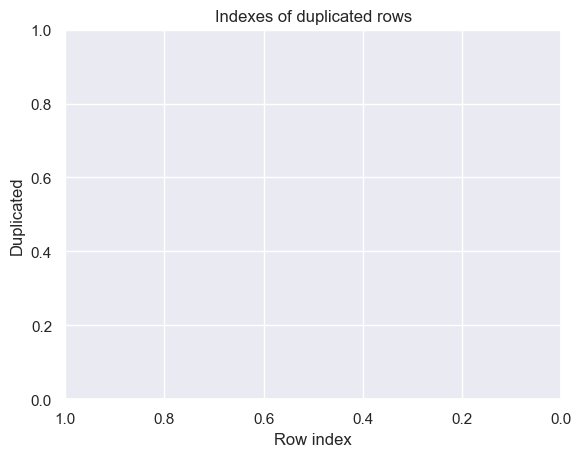

In [12]:
# Funcion para ver duplicados en el dataset. No hay duplicados
duplicated_rows = pd.DataFrame({
    'duplicated': bmw.duplicated(),
    'row': range(1, len(bmw) + 1)
})


duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

plt.figure()
plt.vlines(duplicated_rows['row'], ymin=0, ymax=1, colors='black')
plt.gca().invert_xaxis()
plt.title('Indexes of duplicated rows')
plt.xlabel('Row index')
plt.ylabel('Duplicated')
plt.show()

ANÁLISIS UNIVARIABLE - COLUMNA A COLUMNA 

In [13]:
# Saber cuantos valores tenemos de cada variable (dentro de cada columna)
for i in bmw:
  print(i, bmw[i].value_counts())

marca marca
BMW    3873
Name: count, dtype: int64
modelo modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
km km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64
potencia potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64
fecha_registro fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dty

In [14]:
# Analizar la columna marca
bmw["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [15]:
# Analizar la columna modelo
bmw["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [16]:
# Visualizar ambas columnas: marca y modelo
bmw[["marca", "modelo"]]

,marca,modelo
0,NaN,118
1,BMW,M4
2,BMW,320
3,BMW,420
4,BMW,425
...,...,...
4838,BMW,218 Gran Tourer
4839,BMW,218 Active Tourer
4840,BMW,218 Gran Tourer
4841,BMW,218 Active Tourer


In [17]:
# Analizar la columna km
bmw["km"].value_counts()

km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64

<Axes: >

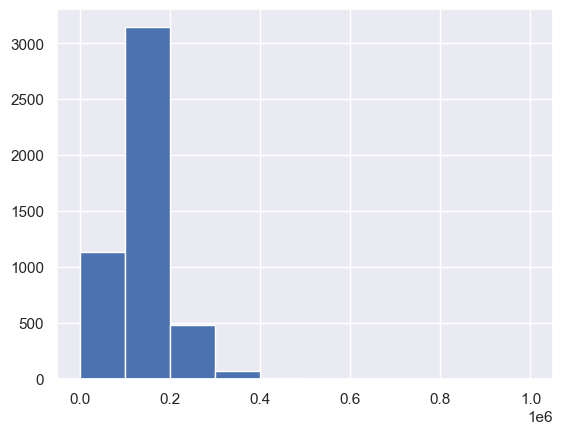

In [18]:
# Analizar el histograma de la columna km
bmw["km"].hist()

In [19]:
# Analizar la columna potencia
bmw["potencia"].value_counts()

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64

<Axes: >

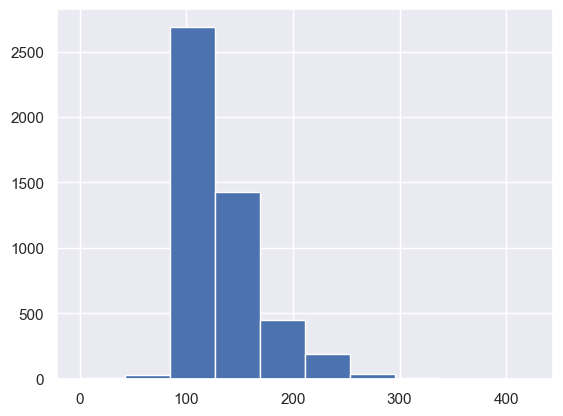

In [20]:
# Analizar el histograma de la columna potencia
bmw["potencia"].hist()

In [21]:
bmw.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [22]:
# Analizar la columna tipo_gasolina. Detectamos aqui un error en la palabra "diesel" y "Diesel"
bmw["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

<Axes: >

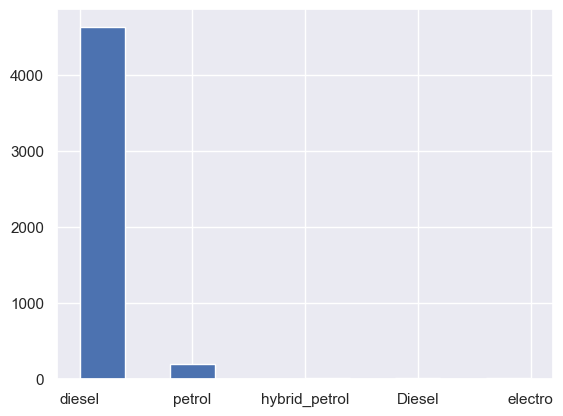

In [23]:
# Analizar el histograma de la columna tipo_gasolina
bmw["tipo_gasolina"].hist()

In [24]:
# Analizar la columna color
bmw["color"].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

<Axes: >

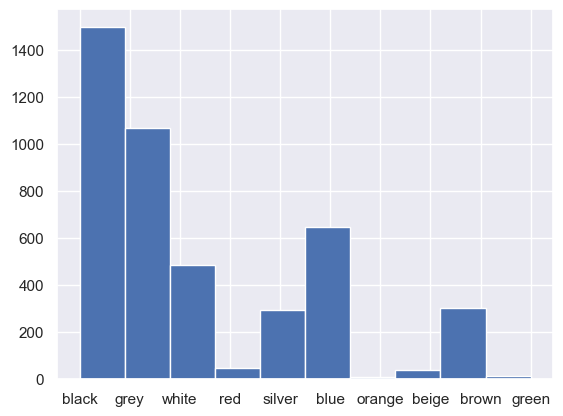

In [25]:
# Analizar el histograma de la columna color
bmw["color"].hist()

In [26]:
# Analizar la columna tipo_coche
bmw["tipo_coche"].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [27]:
# Analizar la columna volante_regulable
bmw["volante_regulable"].value_counts()

volante_regulable
True     2662
False    2177
Name: count, dtype: int64

In [28]:
# Analizar la columna aire_acondicionado
bmw["aire_acondicionado"].value_counts()

aire_acondicionado
True     3465
False     892
Name: count, dtype: int64

In [29]:
# Analizar la columna camara_trasera
bmw["camara_trasera"].value_counts()

camara_trasera
False    3864
True      977
Name: count, dtype: int64

In [30]:
# Analizar la columna asientos_traseros_plegables
bmw["asientos_traseros_plegables"].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [31]:
# Analizar la columna elevalunas_electrico
bmw["elevalunas_electrico"].value_counts()

elevalunas_electrico
False    2612
True     2229
Name: count, dtype: int64

In [32]:
# Analizar la columna bluetooth
bmw["bluetooth"].value_counts()

bluetooth
False    3119
True      996
Name: count, dtype: int64

In [33]:
# Analizar la columna gps
bmw["gps"].value_counts()

gps
True     4514
False     329
Name: count, dtype: int64

In [34]:
# Analizar la columna alerta_lim_velocidad
bmw["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2240
False    1875
Name: count, dtype: int64

In [35]:
# Analizar la columna precio
bmw["precio"].value_counts()

precio
13100.0    68
14900.0    65
11900.0    61
14300.0    60
13400.0    57
           ..
48200.0     1
41900.0     1
38800.0     1
28400.0     1
45100.0     1
Name: count, Length: 437, dtype: int64

<Axes: >

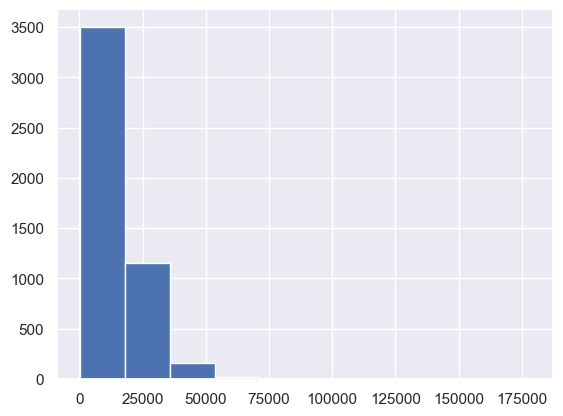

In [36]:
# Analizar el histograma de la columna precio
# No parece que hayan outliers
bmw["precio"].hist()

In [37]:
# Analizar el precio mínimo
bmw["precio"].min()

100.0

In [38]:
# Analizar el precio maximo
bmw["precio"].max()

178500.0

In [39]:
# Analizar el precio medio
bmw["precio"].mean()

15831.920611949556

In [40]:
# La media y la mediana se parecen bastante
bmw["precio"].describe()

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [41]:
# Comparando marca, modelo y precio
bmw[["marca", "modelo", "precio"]]

,marca,modelo,precio
0,NaN,118,11300.0
1,BMW,M4,69700.0
2,BMW,320,10200.0
3,BMW,420,25100.0
4,BMW,425,33400.0
...,...,...,...
4838,BMW,218 Gran Tourer,14600.0
4839,BMW,218 Active Tourer,17500.0
4840,BMW,218 Gran Tourer,17000.0
4841,BMW,218 Active Tourer,22700.0


In [42]:
modelo_barato = bmw[bmw["precio"] == bmw["precio"].min()]["modelo"].values[0]

In [43]:
modelo_barato

'320'

In [44]:
# Un outlier, precio muy barato
bmw["precio"].min()

100.0

In [45]:
# Hay coches muy baratos, no sé si considerarlos outliers
bmw[bmw["precio"] < 500 ]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,NaN,320,179358.0,120.0,2013-06-01,diesel,black,NaN,False,True,False,NaN,False,False,True,True,100.0,2018-03-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,NaN,False,False,False,True,100.0,2018-04-01
1255,BMW,320,170381.0,135.0,NaN,diesel,silver,NaN,True,True,False,NaN,False,False,True,False,100.0,2018-05-01
1513,BMW,520,358332.0,100.0,NaN,diesel,blue,NaN,False,False,False,NaN,True,False,True,False,400.0,2018-07-01
1558,BMW,520,358333.0,100.0,NaN,diesel,blue,estate,False,False,False,NaN,True,NaN,True,NaN,400.0,2018-07-01
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,NaN,False,False,True,NaN,100.0,2018-03-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,NaN,sedan,False,NaN,False,False,False,False,True,NaN,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,NaN,False,False,False,NaN,True,False,200.0,2018-08-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01


In [46]:
# Analizar la columna "fecha_registro"
bmw["fecha_registro"].value_counts()


fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dtype: int64

VISUALIZACION DE DATOS

In [47]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

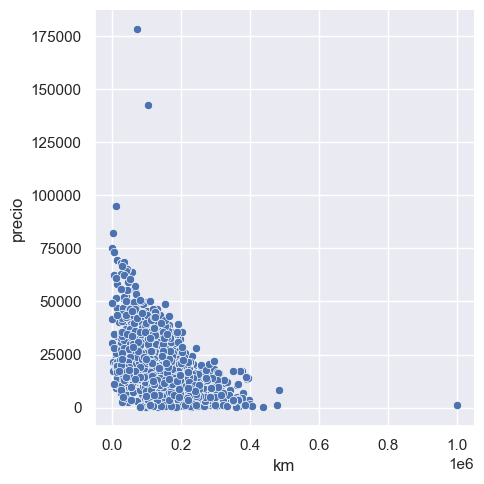

In [48]:
# Hacer un scatterplot con km y precio
sns.relplot(x="km", y="precio", data=bmw);

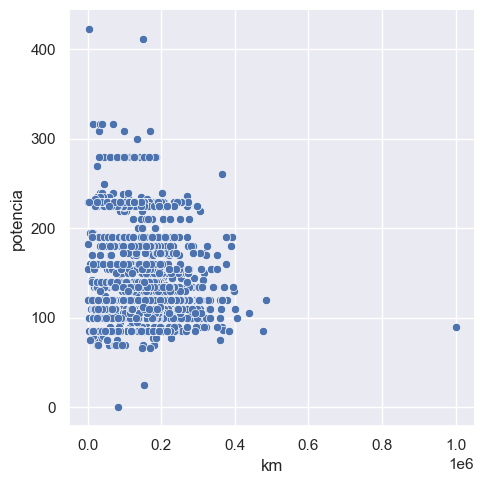

In [49]:
# Hacer un scatterplot con km y potencia
sns.relplot(x="km", y="potencia", data=bmw);

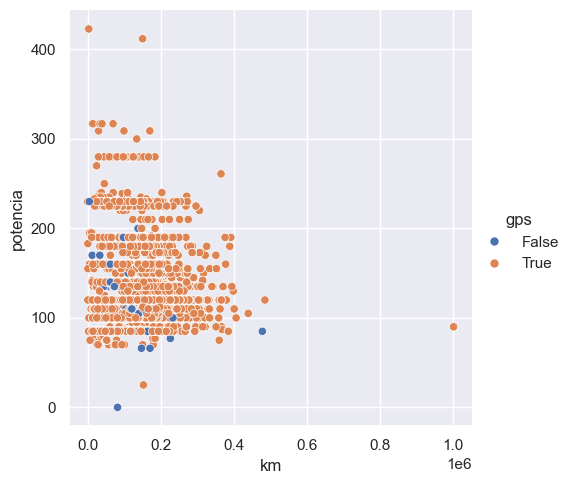

In [50]:
# Hacer un scatter plot con diferencias categoricas
sns.relplot(x="km", y="potencia", hue="gps", data=bmw);

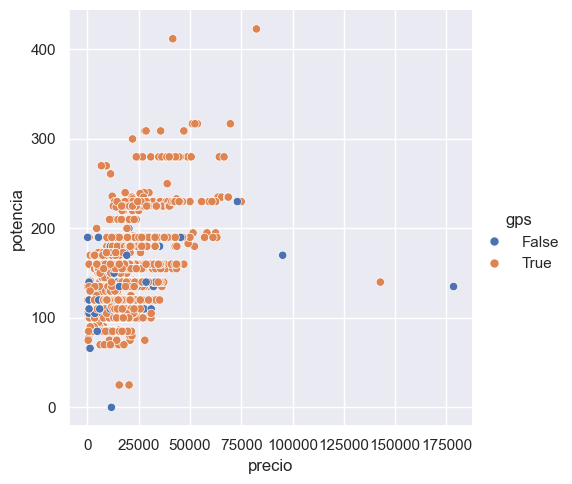

In [51]:
# Hacer un scatter plot con diferencias categoricas
sns.relplot(x="precio", y="potencia", hue="gps", data=bmw);

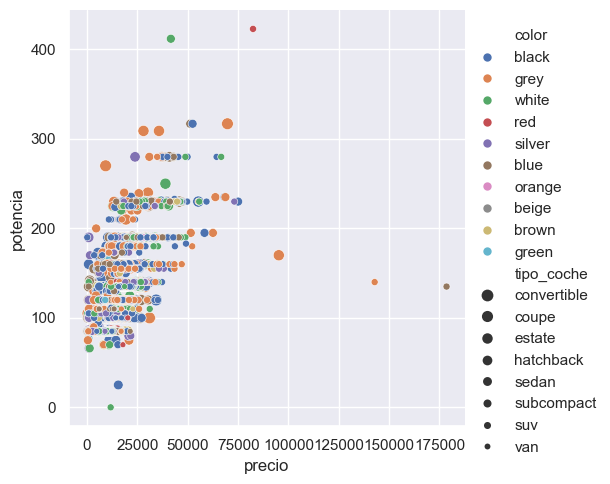

In [52]:
# Hacer un scatter plot con diferencias categoricas y tamaño
sns.relplot(x="precio", y="potencia", hue="color", size = "tipo_coche", data=bmw);

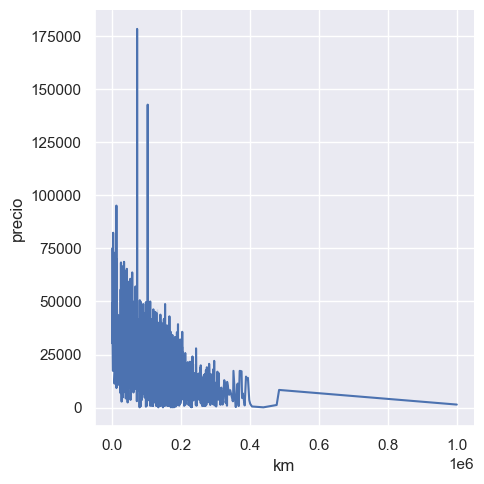

In [53]:
# Hacer un line plot con km y precio
sns.relplot(x="km", y="precio", kind="line",data=bmw);

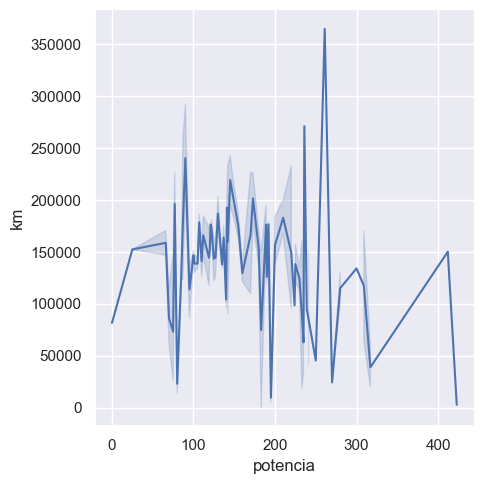

In [54]:
# Hacer un line plot con potencia y km
sns.relplot(x="potencia", y="km", kind="line",data=bmw);

# PRIMEROS CÁLCULOS - PREPROCESAMIENTO

### ERRORES EN DATASET

In [55]:
# Cambiamos el registro "Diesel" por "diesel"
bmw["tipo_gasolina"]=bmw["tipo_gasolina"].replace("Diesel", "diesel", regex=True)

In [56]:
bmw["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4636
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

### ANALISIS Y DECISIÓN SOBRE OUTLIERS

In [57]:
# Vamos a analizar los outliers de algunas variables. Probaremos estas 5 formas:
# 1. Histograma.
# 2. Diagrama de caja.
# 3. Z-score.
# 4. Z-score modificada.
# 5. Rango Intercuartílico (IQR).

 - km

In [58]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw["km"].describe()
# Vemos un min negativo
# ¿El máximo es muy elevado con respecto a la media?

count    4.841000e+03
mean     1.409593e+05
std      6.020853e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410800e+05
75%      1.752170e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: >

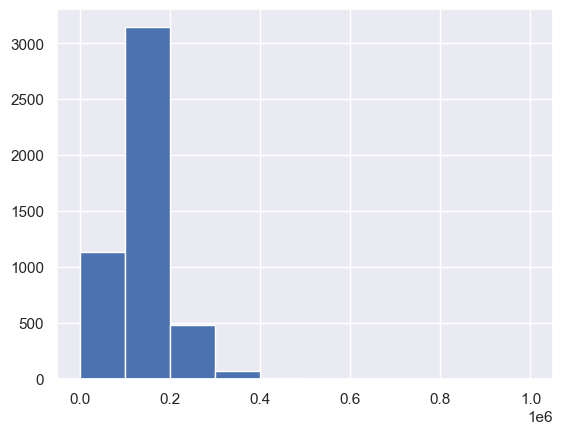

In [59]:
# Histograma
bmw["km"].hist()

<Axes: xlabel='km', ylabel='Count'>

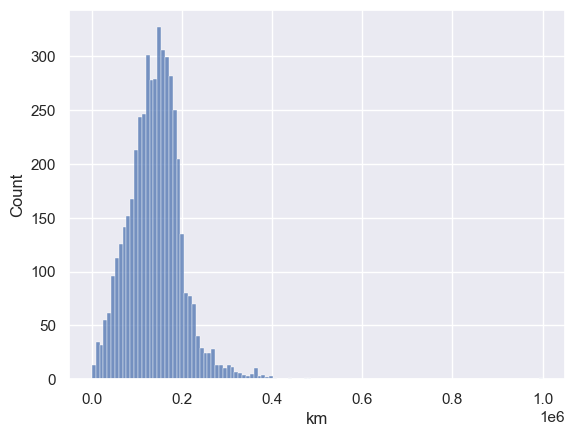

In [60]:
sns.histplot(data = bmw, x = 'km')

<Axes: xlabel='km'>

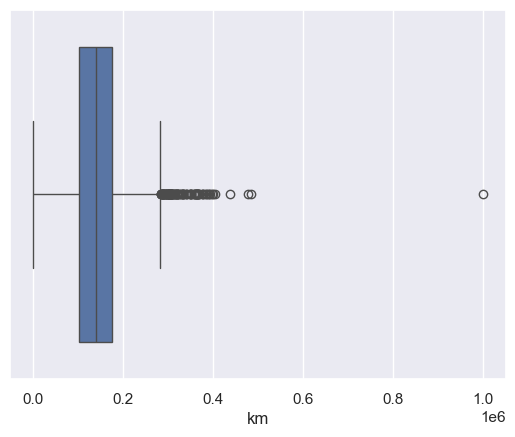

In [61]:
#  Diagrama de caja
# Tambien se puede poner asi: sns.boxplot(data = bmw, x = 'km')
sns.boxplot(x=bmw["km"])

In [62]:
# Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth_km = bmw['km'].quantile(0.75)
twenty_fifth_km = bmw['km'].quantile(0.25)

# Obtain IQR
iqr_km = seventy_fifth_km - twenty_fifth_km

# Upper and lower thresholds
upper_km = seventy_fifth_km + (1.5 * iqr_km)
lower_km = twenty_fifth_km - (1.5 * iqr_km)

# Subset the dataset
outliers2_km = bmw[(bmw['km'] < lower_km) | (bmw['km'] > upper_km)]
outliers2_km.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
56,BMW,320,329173.0,110.0,2004-07-01,diesel,silver,NaN,True,False,False,NaN,False,NaN,True,True,2300.0,2018-08-01
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,False,NaN,True,False,True,NaN,8200.0,2010-04-01
179,BMW,320,302525.0,100.0,NaN,diesel,grey,estate,False,NaN,False,NaN,False,False,True,False,1000.0,2018-09-01
262,BMW,318,319724.0,90.0,NaN,diesel,grey,estate,True,False,False,NaN,False,False,True,False,3000.0,2018-01-01
450,BMW,525,316855.0,150.0,2010-12-01,diesel,black,NaN,True,NaN,True,False,True,NaN,True,False,9400.0,2018-04-01


In [63]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_km)}')

Number of outliers: 97


In [64]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw2 = bmw.copy()

In [65]:
# Calculate the median
median_value_km = bmw2['km'].median()

# Impute outliers with the median
bmw2.loc[outliers2_km.index, 'km'] = median_value_km

- potencia

In [66]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw["potencia"].describe()
# ¿El máximo es muy elevado con respecto a la media?

count    4842.000000
mean      128.981826
std        38.994839
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

<Axes: >

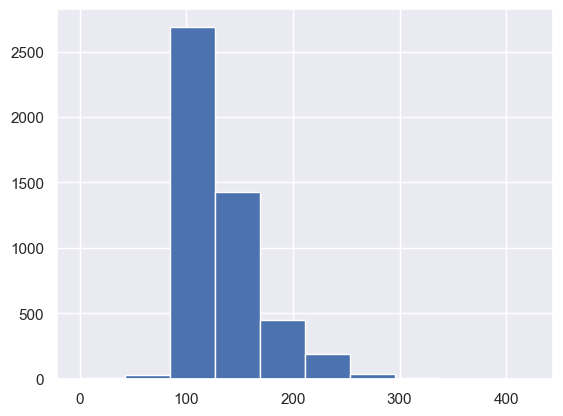

In [67]:
#  Histograma
bmw2["potencia"].hist()

<Axes: xlabel='potencia', ylabel='Count'>

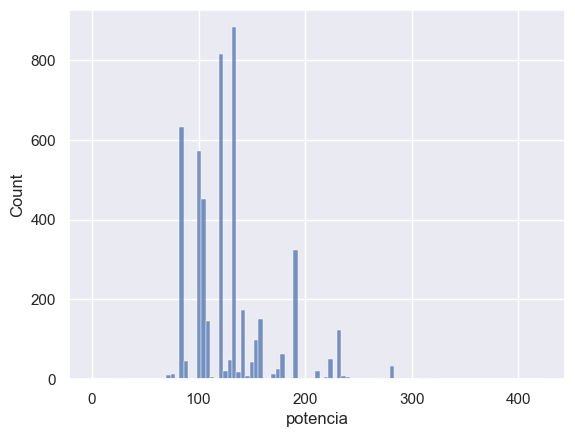

In [68]:
sns.histplot(data = bmw2, x = 'potencia')

<Axes: xlabel='potencia'>

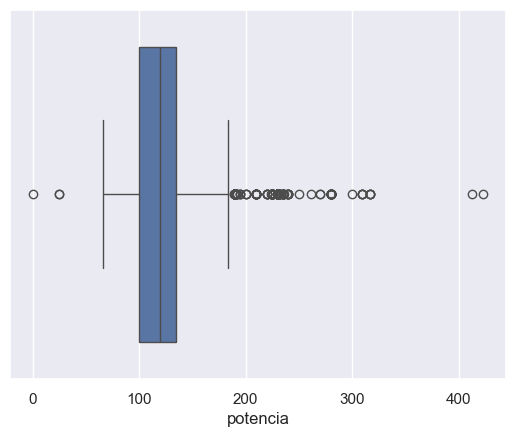

In [69]:
# Diagrama de caja
sns.boxplot(x=bmw2["potencia"])

In [70]:
# Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth_potencia = bmw2['potencia'].quantile(0.75)
twenty_fifth_potencia = bmw2['potencia'].quantile(0.25)

# Obtain IQR
iqr_potencia = seventy_fifth_potencia - twenty_fifth_potencia

# Upper and lower thresholds
upper_potencia = seventy_fifth_potencia + (1.5 * iqr_potencia)
lower_potencia = twenty_fifth_potencia - (1.5 * iqr_potencia)

# Subset the dataset
outliers2_potencia = bmw2[(bmw2['potencia'] < lower_potencia) | (bmw2['potencia'] > upper_potencia)]
outliers2_potencia.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
17,BMW,650,24521.0,270.0,NaN,petrol,grey,convertible,True,False,False,False,False,False,True,False,9200.0,2018-09-01
20,BMW,135,126213.0,225.0,2013-02-01,petrol,white,convertible,False,False,False,NaN,False,True,True,True,16800.0,2018-05-01
26,BMW,430,113678.0,190.0,NaN,diesel,black,NaN,True,True,False,False,True,NaN,True,NaN,30100.0,2018-05-01


In [71]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_potencia)}')

Number of outliers: 591


In [72]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw3 = bmw2.copy()

In [73]:
# Calculate the median
median_value_potencia = bmw3['potencia'].median()

# Impute outliers with the median
bmw3.loc[outliers2_potencia.index, 'potencia'] = median_value_potencia

- fecha_registro y fecha_venta (los cambio a datetime)

In [74]:
# Cambio la fecha_registro a formato datetime, y así más tarde poder restarla con fecha_venta
bmw3["fecha_registro"] = pd.to_datetime(bmw3["fecha_registro"])

In [75]:
# Cambio la fecha_venta a formato datetime

bmw3["fecha_venta"] = pd.to_datetime(bmw3["fecha_venta"])

In [76]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw3["fecha_registro"].describe()

count                             2420
mean     2012-12-06 07:35:12.396694016
min                1990-03-01 00:00:00
25%                2012-07-01 00:00:00
50%                2013-07-01 00:00:00
75%                2014-04-01 00:00:00
max                2017-11-01 00:00:00
Name: fecha_registro, dtype: object

<Axes: >

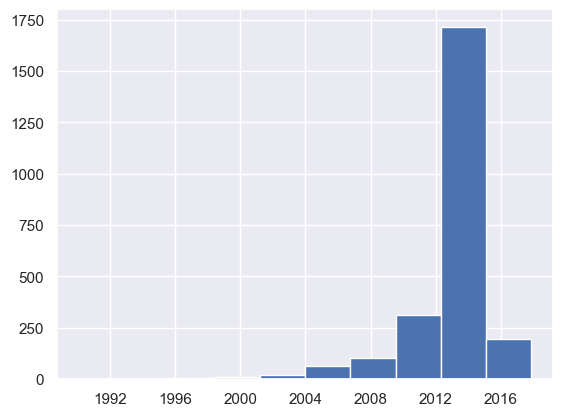

In [77]:
# Histograma
bmw3["fecha_registro"].hist()

<Axes: xlabel='fecha_registro', ylabel='Count'>

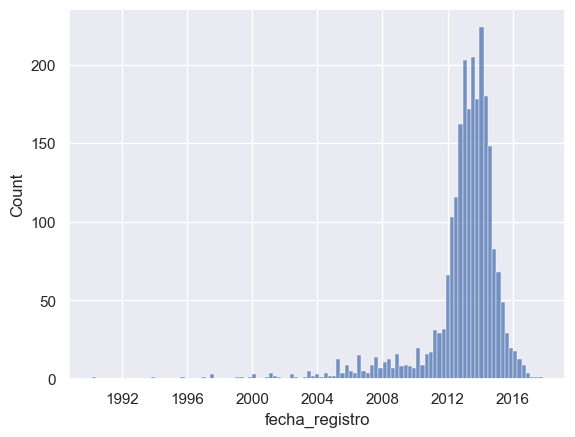

In [78]:
sns.histplot(data = bmw3, x = 'fecha_registro')

<Axes: xlabel='fecha_registro'>

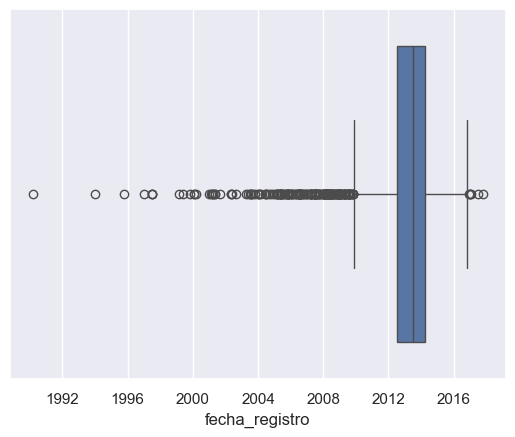

In [79]:
# Diagrama de caja
sns.boxplot(x=bmw3["fecha_registro"])

In [80]:
# DECISION SOBRE OUTLIERS
# Decido mantenerlos. 

In [81]:
# Restamos ambas columnas para tener un numerico, tiempo de venta
bmw3["tiempo_venta"]=bmw3["fecha_venta"] - bmw3["fecha_registro"]

In [82]:
bmw3.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2161 days
1,BMW,M4,13929.0,120.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaT
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2132 days
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaT
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaT


- precio

In [83]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw3["precio"].describe()
# ¿El máximo es muy elevado con respecto a la media?

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: >

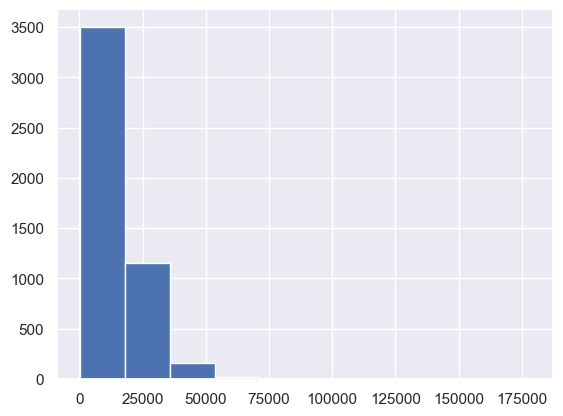

In [84]:
# Histograma
bmw3["precio"].hist()

<Axes: xlabel='precio', ylabel='Count'>

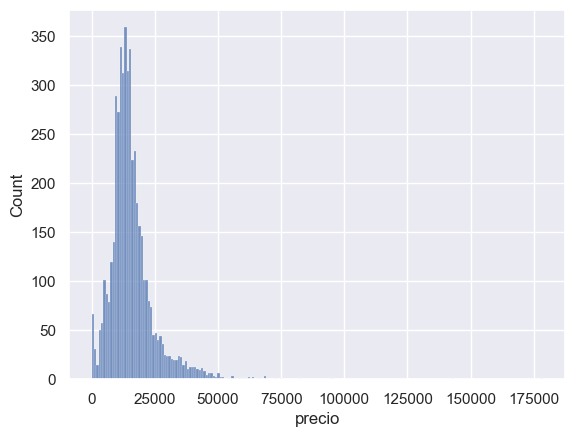

In [85]:
sns.histplot(data = bmw3, x = 'precio')

<Axes: xlabel='precio'>

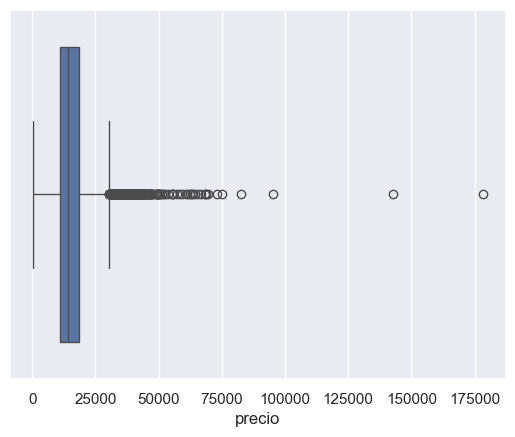

In [86]:
# Diagrama de caja
sns.boxplot(x=bmw3["precio"])

In [87]:
# A partir 10000€, decido cambiarlo por la mediana. 
# Menos de 2000€ decido cambiarlo por la mediana
outliers2_precio = bmw3[(bmw3["precio"]<= 2000) | (bmw3["precio"] > 100000)] 

In [88]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_precio)}')

Number of outliers: 100


In [89]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw4 = bmw3.copy()

In [90]:
# Calculate the median
median_value_precio = bmw4['precio'].median()

# Impute outliers with the median
bmw4.loc[outliers2_precio.index, 'precio'] = median_value_precio

<Axes: >

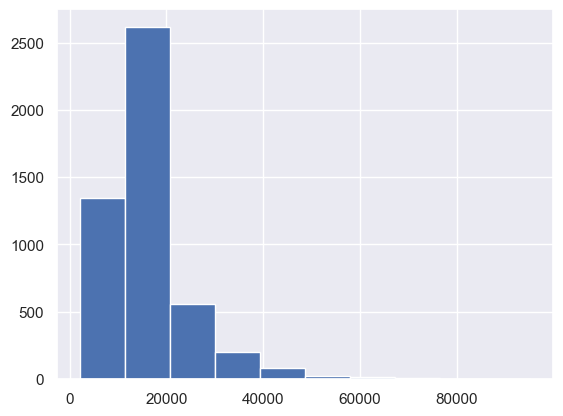

In [91]:
# Verificamos
bmw4["precio"].hist()

### ANÁLISIS Y DECISIÓN SOBRE NULOS

In [92]:
bmw4.isnull().sum()
# Tenemos nulos en casi todas las columnas, salvo la columna gps

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
tiempo_venta                   2423
dtype: int64

In [93]:
bmw4["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

<Axes: >

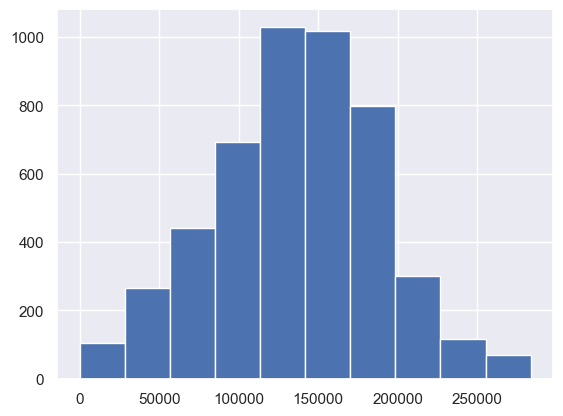

In [94]:
# Histograma de la columna km,  tiene ahora distribucion normal
bmw4["km"].hist()

<Axes: >

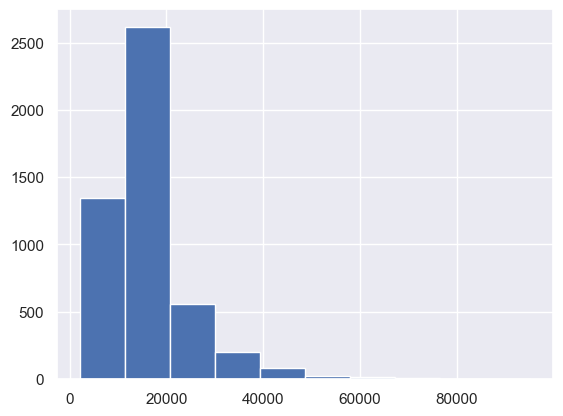

In [95]:
# Histograma de la columna precio,  tiene ahora una forma de distribución normal. 
bmw4["precio"].hist()

In [96]:
# No hay negativos en el precio, o igual a 0
bmw4[bmw4["precio"] <= 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta


<Axes: >

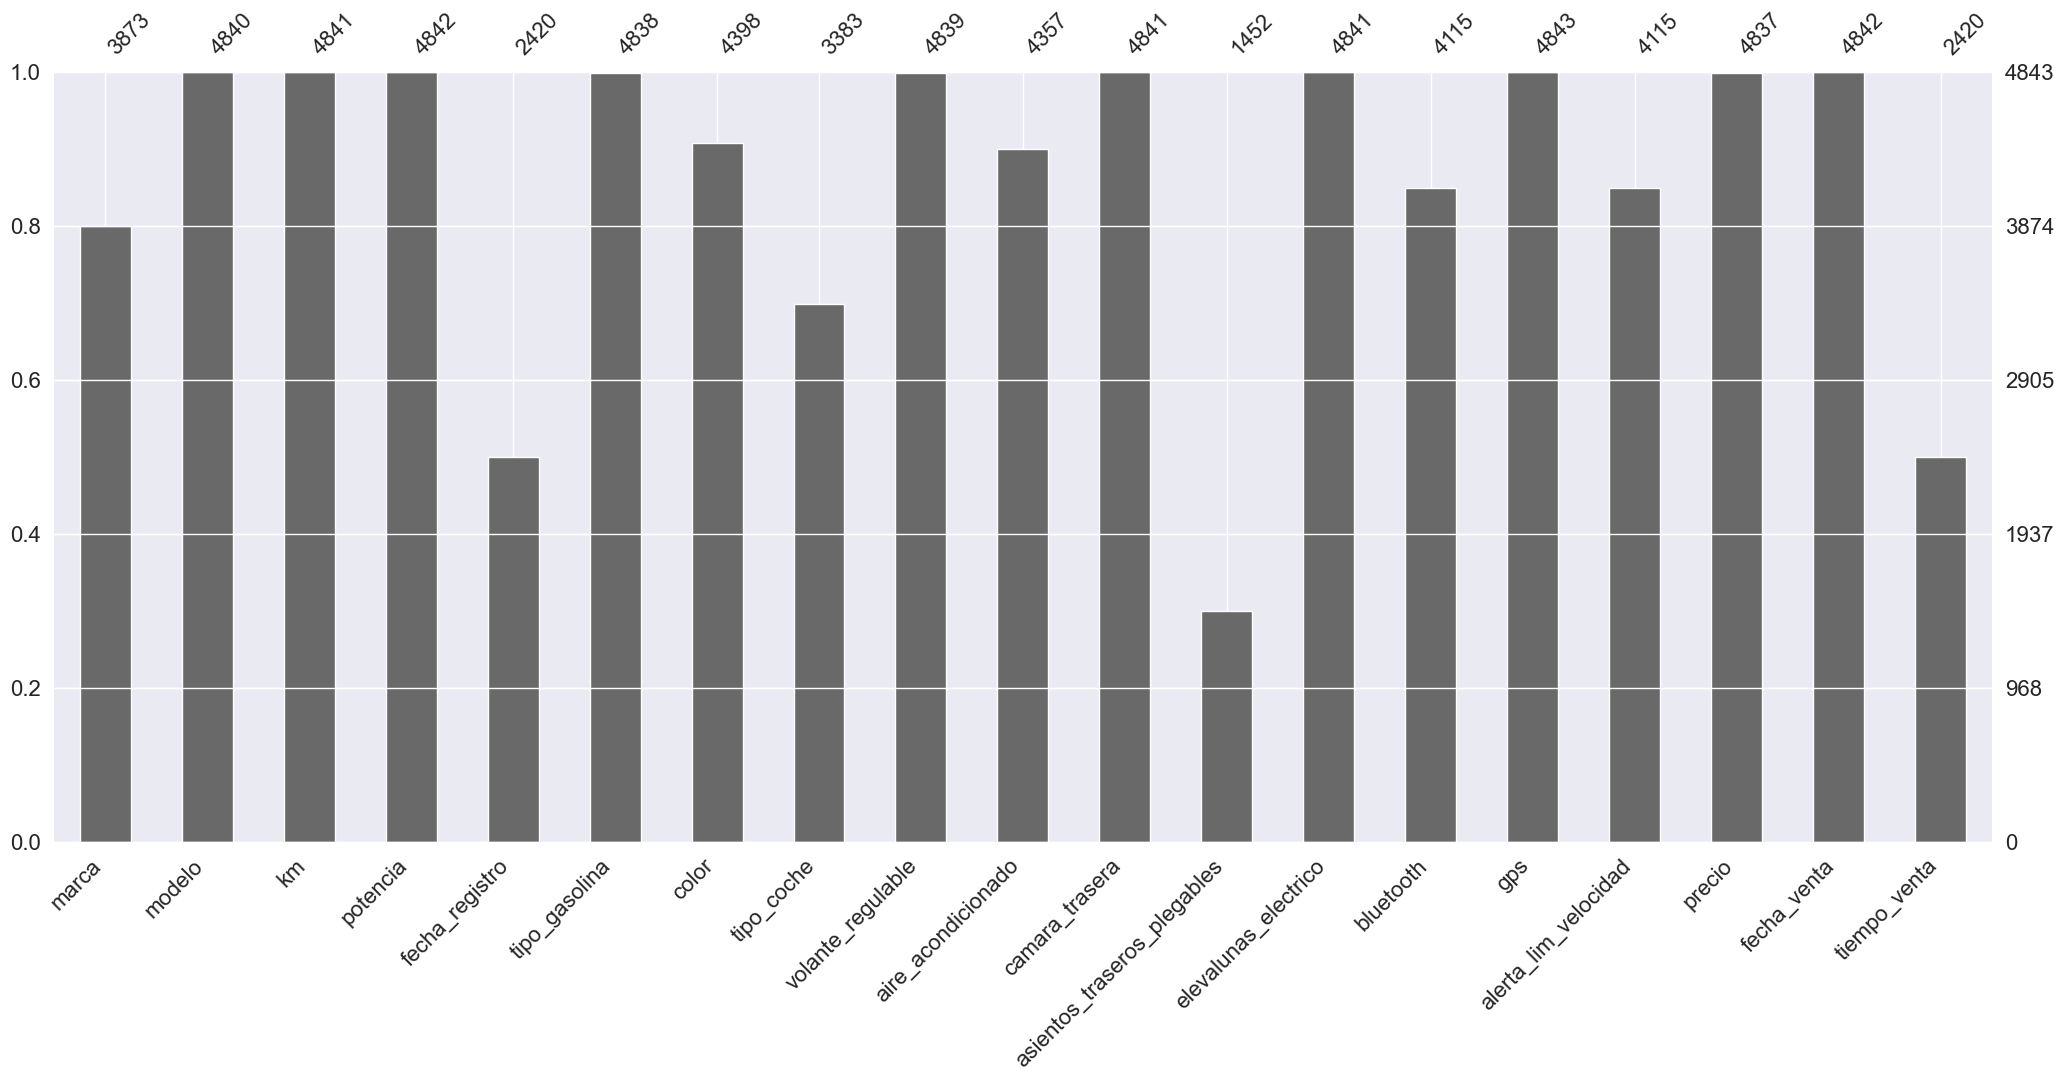

In [97]:
# Veamos la distribución de nulos en nuestro dataset con la librería missingno. Funcion bar
msno.bar (bmw4)

<Axes: >

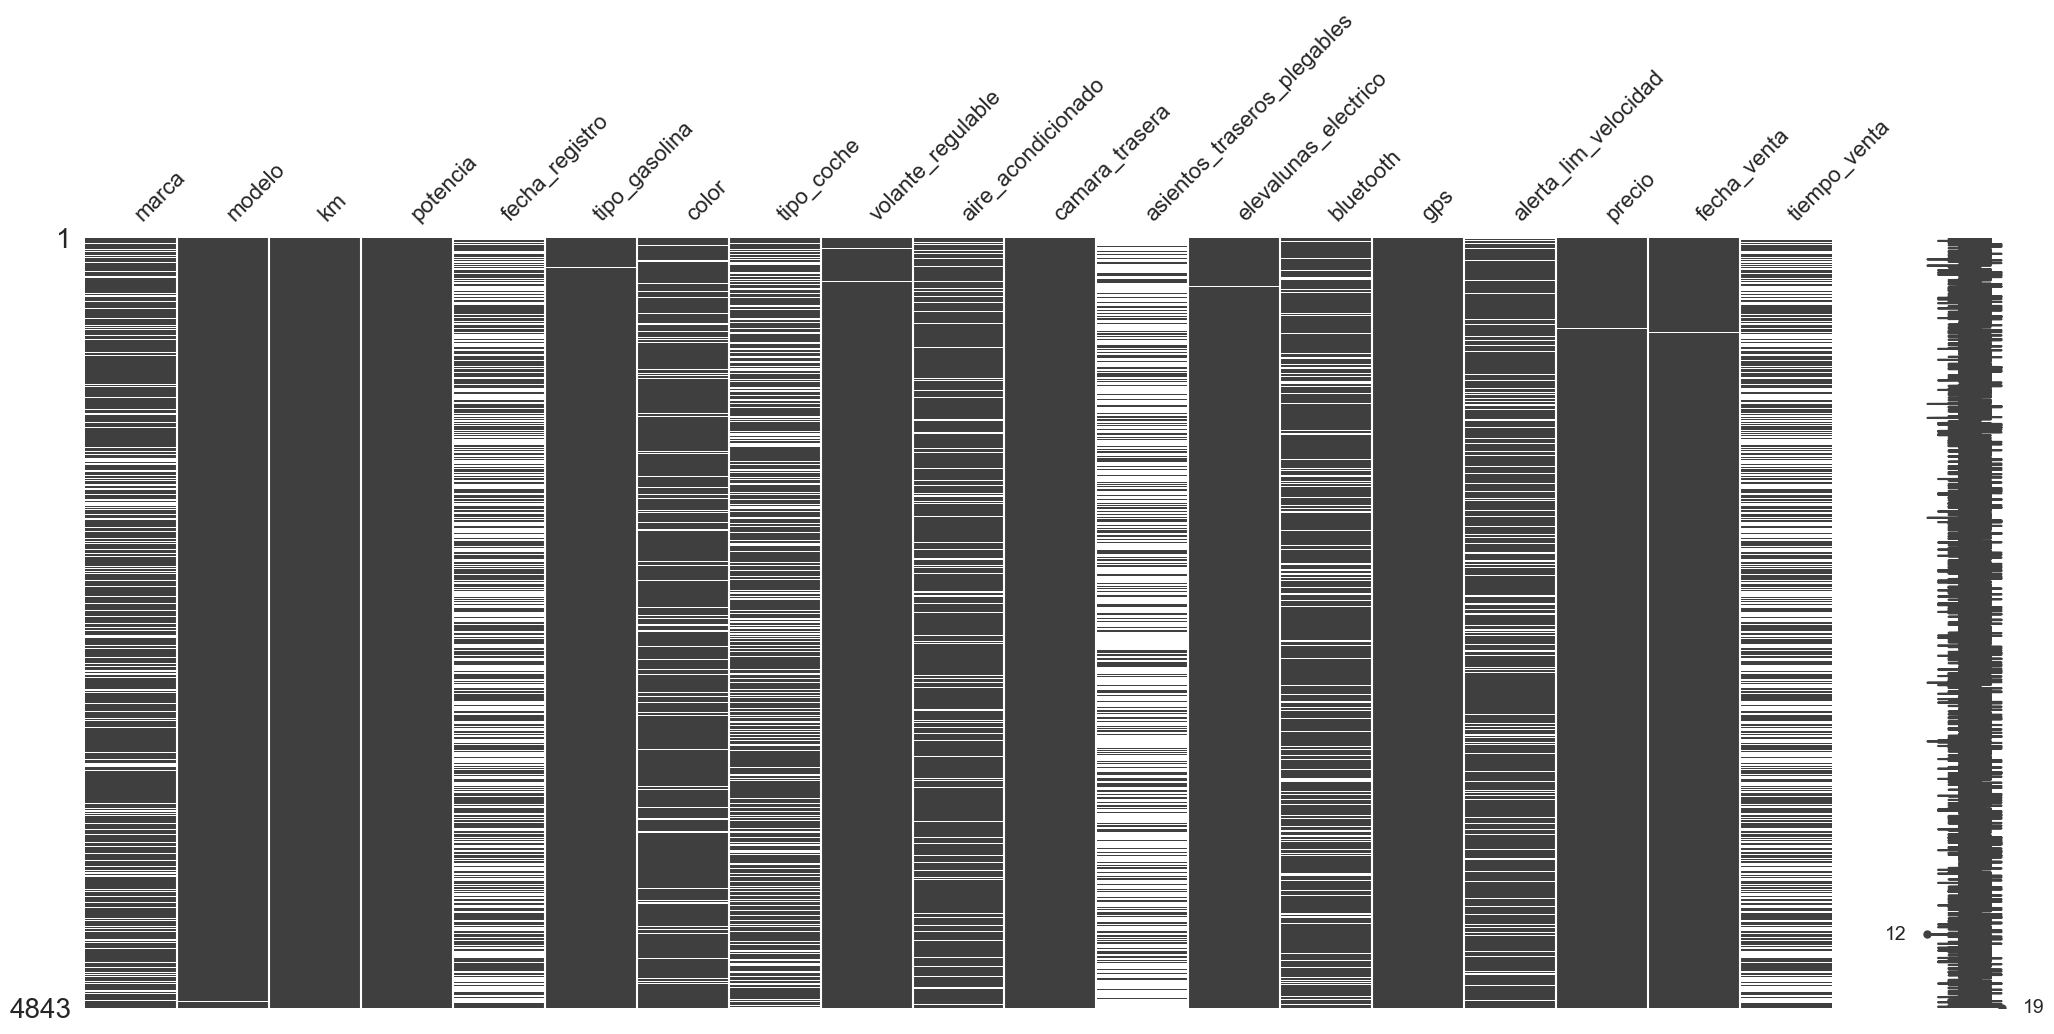

In [98]:
# Funcion matrix
msno.matrix (bmw4)

<Axes: >

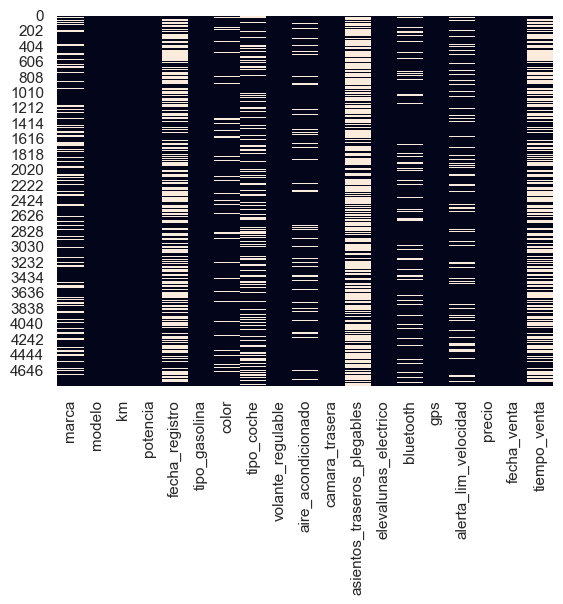

In [99]:
# Funcion heatmap
sns.heatmap(bmw4.isnull(), cbar=False)

<Axes: >

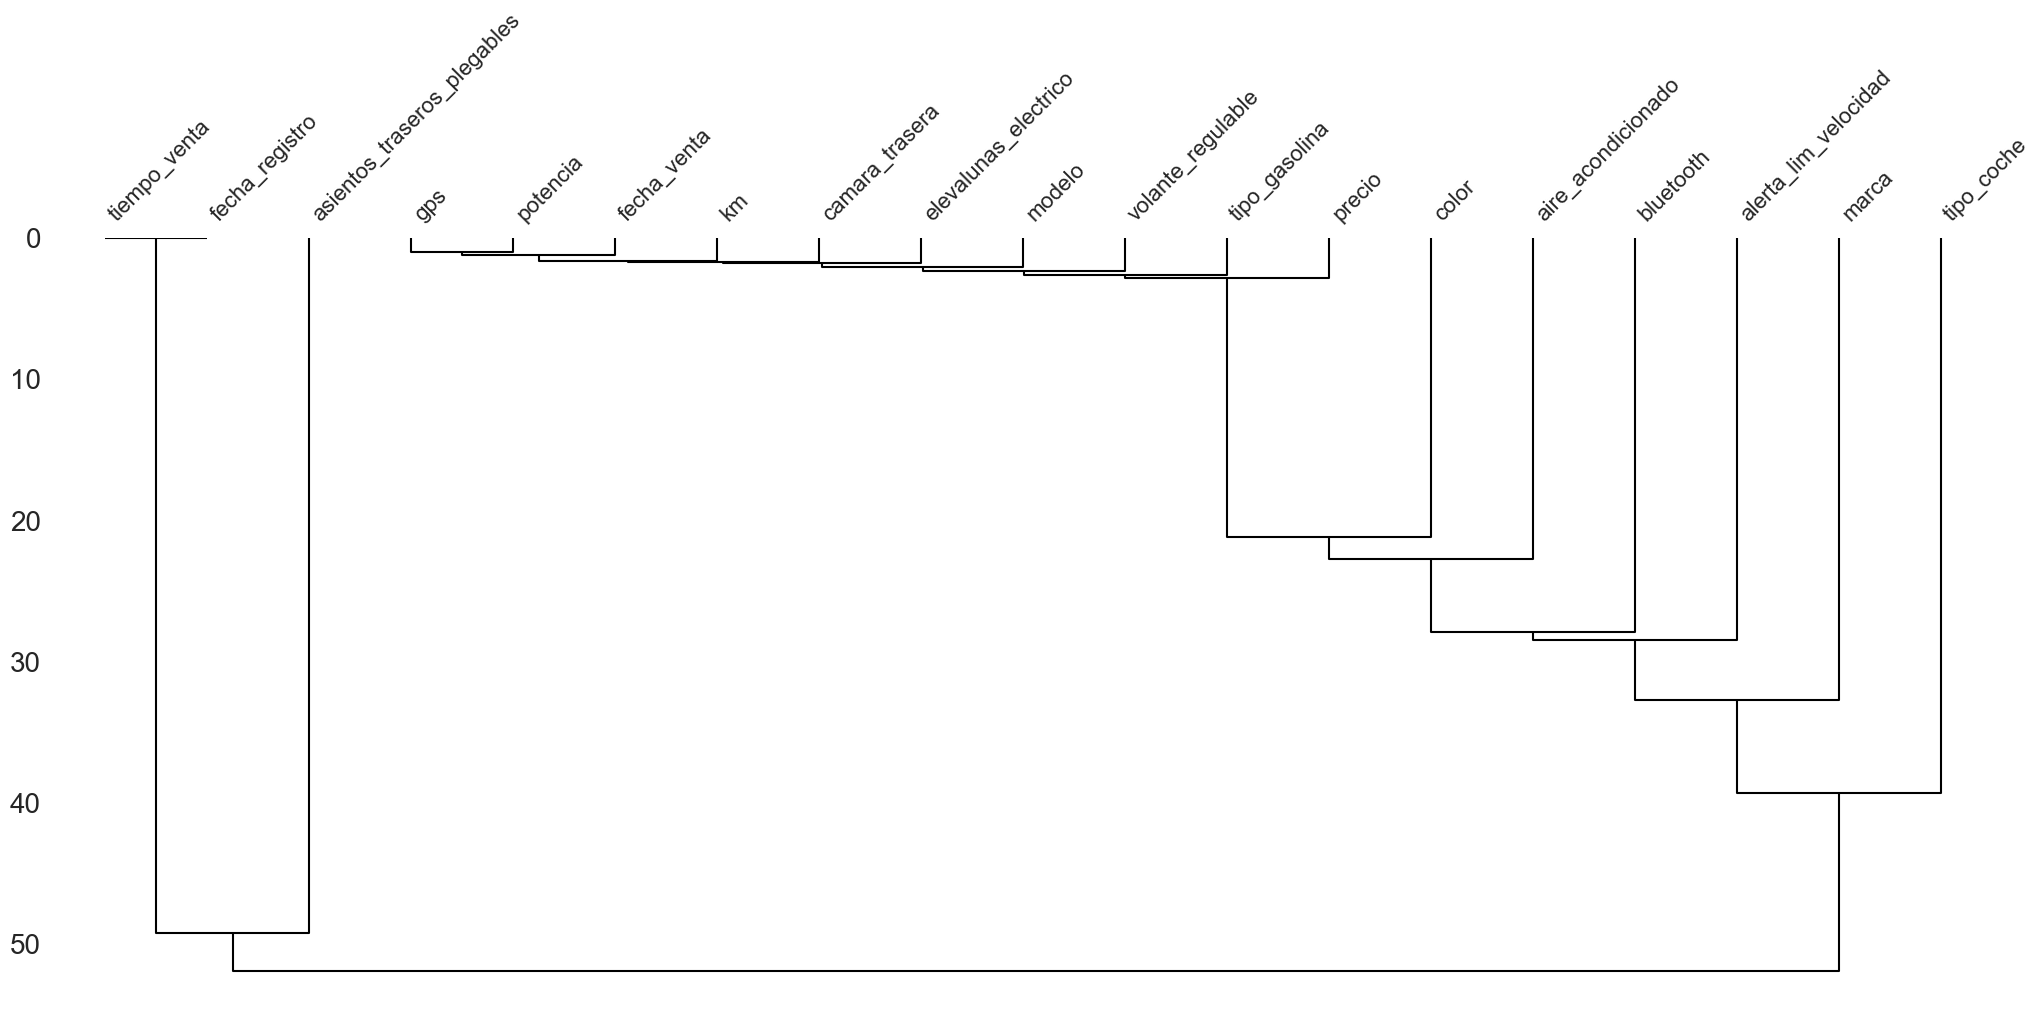

In [100]:
# Funcion dendrogram
msno.dendrogram (bmw4)

In [101]:
bmw5 = bmw4.copy()

In [102]:
# Los nulos en:
# - Marca: no tenemos claro que sean de la marca BMW, se podrían cambiar a "BMW"
# - Modelo: hay 3 nulos en Modelo, que se podrían eliminar - NULOS ELIMINAR
# - km: se podría hacer una mediana
# - potencia: se podría hacer una mediana
# - tipo_gasolina: Cambiar a "sin_tipo_gasolina"
# - color: Cambiar a "sin_color"
# - tipo_coche: Cambiar a "sin_tipo_coche"
# - volante_regulable: se podrían eliminar - NULOS ELIMINAR
# - aire_acondicionado: se podrían cambiar a -1 
# - camara_trasera: se podrían eliminar - NULOS ELIMINAR
# - asientos_traseros_plegables: Demasiados nulos, más del 50%, decido ELIMINAR COLUMNA 
# - elevalunas_electrico: se podrían eliminar - NULOS ELIMINAR
# - bluetooth: se podrían cambiar a -1 
# - alerta_lim_velocidad: se podrían cambiar a -1 

# - tiempo de venta, los nulos los cambiamos a mediana

# - precio: los he cambiado por el valor de la mediana


- Modelo

In [103]:
# Calculando porcentaje de nulos de modelo
(bmw5["modelo"].isnull().sum()/bmw5.shape[0])*100

0.06194507536650836

In [104]:
# Quiero saber el total de nulos de la columna modelo
bmw5["modelo"].isnull().sum()

3

In [105]:
# Decido eliminar estas 3 filas
bmw5.dropna(subset=["modelo"], inplace=True)

In [106]:
# Verificación
bmw5["modelo"].isnull().sum()

0

 - km

In [107]:
# Calculando porcentaje de nulos de km
(bmw5["km"].isnull().sum()/bmw5.shape[0])*100

0.04132231404958678

In [108]:
# Quiero saber el total de nulos de la columna km
bmw5["km"].isnull().sum()

2

In [109]:
bmw5["km"].describe()

count      4838.000000
mean     136990.029351
std       51927.416234
min         -64.000000
25%      102863.000000
50%      141080.000000
75%      172202.500000
max      283612.000000
Name: km, dtype: float64

In [110]:
# Decido poner en los dos nulos el valor de la mediana de km
bmw5["km"].fillna(bmw5["km"].median(), inplace=True)

In [111]:
# Verificación
bmw5["km"].isnull().sum()

0

- potencia

In [112]:
# Calculando porcentaje de nulos de potencia
(bmw5["potencia"].isnull().sum()/bmw5.shape[0])*100

0.02066115702479339

In [113]:
# Quiero saber el total de nulos de la columna potencia
bmw5["potencia"].isnull().sum()

1

In [114]:
bmw5["potencia"].describe()

count    4839.000000
mean      117.943377
std        21.468679
min        66.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       183.000000
Name: potencia, dtype: float64

In [115]:
# Decido poner en el nulo el valor de la mediana de potencia
bmw5["potencia"].fillna(bmw5["potencia"].median(), inplace=True)

In [116]:
# Verificación
bmw5["potencia"].isnull().sum()

0

tiempo_venta

In [117]:
bmw5.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2161 days
1,BMW,M4,13929.0,120.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaT
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2132 days
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaT
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaT


In [118]:
# eliminamos columnas de fechas
del bmw5["fecha_registro"]

In [119]:
del bmw5["fecha_venta"]

In [120]:
bmw5.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2161 days
1,BMW,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,NaT
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2132 days
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,NaT
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,NaT


In [121]:
# Calculando porcentaje de nulos de tiempo_venta
(bmw5["tiempo_venta"].isnull().sum()/bmw5.shape[0])*100

50.02066115702479

In [122]:
bmw5["tiempo_venta"].isnull().sum()

2421

In [123]:
# Cambio los nulos a su mediana
bmw5["tiempo_venta"].fillna(bmw5["tiempo_venta"].median(), inplace=True)

In [124]:
# Verificación
bmw5["tiempo_venta"].isnull().sum()

0

In [125]:
bmw5.head(20)

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2161 days
1,BMW,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,1767 days
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2132 days
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,1767 days
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,1767 days
5,BMW,335,152352.0,120.0,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2468 days
6,BMW,325,205219.0,145.0,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,1767 days
7,BMW,118,115560.0,105.0,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,3106 days
8,NaN,Z4,123886.0,125.0,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,1767 days
9,BMW,320,139541.0,135.0,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,1767 days


- tipo_gasolina

In [126]:
# Calculando porcentaje de nulos de tipo_gasolina
(bmw5["tipo_gasolina"].isnull().sum()/bmw5.shape[0])*100

0.10330578512396695

In [127]:
bmw5["tipo_gasolina"].isnull().sum()

5

In [128]:
# Cambio los nulos a "sin_tipo_gasolina"
bmw5["tipo_gasolina"].fillna("sin_tipo_gasolina", inplace=True)

In [129]:
# Verificación
bmw5["tipo_gasolina"].isnull().sum()

0

- color

In [130]:
# Calculando porcentaje de nulos de color
(bmw5["color"].isnull().sum()/bmw5.shape[0])*100

9.194214876033058

In [131]:
bmw5["color"].isnull().sum()

445

In [132]:
# Cambio los nulos a "sin_color"
bmw5["color"].fillna("sin_color", inplace=True)

In [133]:
# Verificación
bmw5["color"].isnull().sum()

0

- tipo_coche

In [134]:
# Calculando porcentaje de nulos de tipo_coche
(bmw5["tipo_coche"].isnull().sum()/bmw5.shape[0])*100

30.123966942148762

In [135]:
bmw5["tipo_coche"].isnull().sum()

1458

In [136]:
# Cambio los nulos a "sin_tipo_coche"
bmw5["tipo_coche"].fillna("sin_tipo_coche", inplace=True)

In [137]:
# Verificación
bmw5["tipo_coche"].isnull().sum()

0

- volante_regulable

In [138]:
# Calculando porcentaje de nulos de volante_regulable
(bmw5["volante_regulable"].isnull().sum()/bmw5.shape[0])*100

0.08264462809917356

In [139]:
# Quiero saber el total de nulos de volante_regulable
bmw5["volante_regulable"].isnull().sum()

4

In [140]:
# Decido eliminar estas 4 filas
bmw5.dropna(subset=["volante_regulable"], inplace=True)

In [141]:
# Verificación
bmw5["volante_regulable"].isnull().sum()

0

- aire_acondicionado

In [142]:
# Calculando porcentaje de nulos de aire_acondicionado
(bmw5["aire_acondicionado"].isnull().sum()/bmw5.shape[0])*100

10.008271298593879

In [143]:
# Quiero saber el total de nulos de aire_acondicionado
bmw5["aire_acondicionado"].isnull().sum()

484

In [144]:
# Cambio los nulos a "-1"
bmw5["aire_acondicionado"].fillna(-1, inplace=True)

In [145]:
# Verificación
bmw5["aire_acondicionado"].isnull().sum()

0

- camara_trasera

In [146]:
# Calculando porcentaje de nulos de aire_acondicionado
(bmw5["camara_trasera"].isnull().sum()/bmw5.shape[0])*100

0.0413564929693962

In [147]:
# Quiero saber el total de nulos de camara_trasera
bmw5["camara_trasera"].isnull().sum()

2

In [148]:
# Decido eliminar estas 2 filas
bmw5.dropna(subset=["camara_trasera"], inplace=True)

In [149]:
# Verificación
bmw5["camara_trasera"].isnull().sum()

0

- asientos_traseros_plegables


In [150]:
# Calculando porcentaje de nulos de asientos_traseros_plegables
(bmw5["asientos_traseros_plegables"].isnull().sum()/bmw5.shape[0])*100

70.00413736036408

In [151]:
bmw5["asientos_traseros_plegables"].isnull().sum()

3384

In [152]:
# El porcentaje de nulos es muy alto, decido eliminar la columna entera
del(bmw5["asientos_traseros_plegables"])

- elevalunas_electrico

In [153]:
# Calculando porcentaje de nulos de elevalunas_electrico
(bmw5["elevalunas_electrico"].isnull().sum()/bmw5.shape[0])*100

0.04137360364087712

In [154]:
# Quiero saber el total de nulos de camara_trasera
bmw5["elevalunas_electrico"].isnull().sum()

2

In [155]:
# Decido eliminar estas 2 filas
bmw5.dropna(subset=["elevalunas_electrico"], inplace=True)

In [156]:
# Verificación
bmw5["elevalunas_electrico"].isnull().sum()

0

- bluetooth

In [157]:
# Calculando porcentaje de nulos de bluetooth
(bmw5["bluetooth"].isnull().sum()/bmw5.shape[0])*100

15.004139072847684

In [158]:
# Quiero saber el total de nulos de bluetooth
bmw5["bluetooth"].isnull().sum()

725

In [159]:
# Cambio los nulos a "-1"
bmw5["bluetooth"].fillna(-1, inplace=True)

In [160]:
# Verificación
bmw5["bluetooth"].isnull().sum()

0

- alerta_lim_velocidad


In [161]:
# Calculando porcentaje de nulos de alerta_lim_velocidad
(bmw5["alerta_lim_velocidad"].isnull().sum()/bmw5.shape[0])*100

15.004139072847684

In [162]:
# Quiero saber el total de nulos de bluetooth
bmw5["alerta_lim_velocidad"].isnull().sum()

725

In [163]:
# Cambio los nulos a "-1"
bmw5["alerta_lim_velocidad"].fillna(-1, inplace=True)

In [164]:
# Verificación
bmw5["alerta_lim_velocidad"].isnull().sum()

0

- precio

In [165]:
# Calculando porcentaje de nulos de fecha_venta
(bmw5["precio"].isnull().sum()/bmw5.shape[0])*100

0.12417218543046359

In [166]:
# Quiero saber el total de nulos de precio
bmw5["precio"].isnull().sum()

6

In [167]:
bmw5["precio"].describe()

count     4826.000000
mean     16041.193535
std       8470.503172
min       2100.000000
25%      11100.000000
50%      14200.000000
75%      18600.000000
max      95200.000000
Name: precio, dtype: float64

<Axes: >

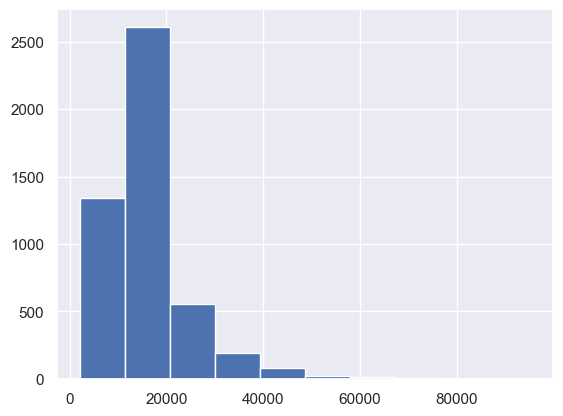

In [168]:
# Cuando cambie el valor de los nulos, tener en cuenta que la mediana se pone cuando hay mucha diversificacion de los datos
bmw5["precio"].hist()

In [169]:
# Decido cambiar los nulos por el valor de la mediana del precio. 
# Tengo dudas de si es buena idea imputar a los nulos por un valor, cuando se trata del target. Igual es mejor eliminar nulos, sin cambiar su valor. 
bmw5["precio"].fillna(bmw5["precio"].median(), inplace=True)

In [170]:
# Verificación
bmw5["precio"].isnull().sum()

0

### ELIMINAR COLUMNAS

In [171]:
# Hacemos una copia
bmw6=bmw5.copy()

In [172]:
# Ya hemos eliminado una columna "asientos_traseros_plegables"

In [173]:
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   marca                 3866 non-null   object         
 1   modelo                4832 non-null   object         
 2   km                    4832 non-null   float64        
 3   potencia              4832 non-null   float64        
 4   tipo_gasolina         4832 non-null   object         
 5   color                 4832 non-null   object         
 6   tipo_coche            4832 non-null   object         
 7   volante_regulable     4832 non-null   object         
 8   aire_acondicionado    4832 non-null   object         
 9   camara_trasera        4832 non-null   object         
 10  elevalunas_electrico  4832 non-null   object         
 11  bluetooth             4832 non-null   object         
 12  gps                   4832 non-null   bool           
 13  alerta_l

In [174]:
# Decido eliminar la columna de marca, ya que son todos "BMW"
del(bmw6["marca"])

In [175]:
# Verificamos
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   km                    4832 non-null   float64        
 2   potencia              4832 non-null   float64        
 3   tipo_gasolina         4832 non-null   object         
 4   color                 4832 non-null   object         
 5   tipo_coche            4832 non-null   object         
 6   volante_regulable     4832 non-null   object         
 7   aire_acondicionado    4832 non-null   object         
 8   camara_trasera        4832 non-null   object         
 9   elevalunas_electrico  4832 non-null   object         
 10  bluetooth             4832 non-null   object         
 11  gps                   4832 non-null   bool           
 12  alerta_lim_velocidad  4832 non-null   object         
 13  precio  

In [176]:
# Ponemos la columna modelo como nuestro índice
nuevo_indice = bmw6.index.astype(str) + '_' + bmw6['modelo'].astype(str)

In [177]:
bmw6.index = nuevo_indice

In [178]:
bmw6.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
0_118,118,140411.0,100.0,diesel,black,sin_tipo_coche,True,True,False,True,-1,True,-1,11300.0,2161 days
1_M4,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,1767 days
2_320,320,183297.0,120.0,diesel,white,sin_tipo_coche,False,False,False,True,False,True,False,10200.0,2132 days
3_420,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,-1,25100.0,1767 days
4_425,425,97097.0,160.0,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,True,33400.0,1767 days


In [179]:
# Eliminamos la columna modelo

In [180]:
del bmw6["modelo"]

### AGRUPAR COLUMANS

In [181]:
# Analizo
bmw6.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
0_118,140411.0,100.0,diesel,black,sin_tipo_coche,True,True,False,True,-1,True,-1,11300.0,2161 days
1_M4,13929.0,120.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,1767 days
2_320,183297.0,120.0,diesel,white,sin_tipo_coche,False,False,False,True,False,True,False,10200.0,2132 days
3_420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,-1,25100.0,1767 days
4_425,97097.0,160.0,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,True,33400.0,1767 days


In [182]:
# Agrupamos valores en una columna


In [183]:
def agrupacion_categorica(dataset, column, limite, new_value, former_null = ""):
  
    """
    Funcion que realiza agrupacion categorica en base a la columna, limite y nuevo valor.
    """
    value_counts = dataset[column].value_counts(dropna=False)
    values_to_replace = value_counts[value_counts < limite ].index

    for i in values_to_replace:
        if i == former_null:
            pass
        else:
            dataset[column] = np.where(dataset[column] == i, new_value, dataset[column])

- tipo_gasolina

In [184]:
bmw6["tipo_gasolina"].value_counts(dropna=False)

tipo_gasolina
diesel               4625
petrol                191
hybrid_petrol           8
sin_tipo_gasolina       5
electro                 3
Name: count, dtype: int64

In [185]:
agrupacion_categorica(bmw6, "tipo_gasolina", 100, "otro_gasolina", "sin_tipo_gasolina")

In [186]:
bmw6["tipo_gasolina"].value_counts(dropna=False)

tipo_gasolina
diesel               4625
petrol                191
otro_gasolina          11
sin_tipo_gasolina       5
Name: count, dtype: int64

- color

In [187]:
bmw6["color"].value_counts(dropna=False)

color
black        1494
grey         1068
blue          647
white         483
sin_color     443
brown         302
silver        291
red            47
beige          37
green          14
orange          6
Name: count, dtype: int64

In [188]:
agrupacion_categorica(bmw6, "color", 400, "otro_color", "sin_color")

In [189]:
bmw6["color"].value_counts(dropna=False)

color
black         1494
grey          1068
otro_color     697
blue           647
white          483
sin_color      443
Name: count, dtype: int64

- tipo_coche

In [190]:
bmw6["tipo_coche"].value_counts(dropna=False)

tipo_coche
sin_tipo_coche    1455
estate            1104
sedan              821
suv                754
hatchback          488
subcompact          77
coupe               74
convertible         30
van                 29
Name: count, dtype: int64

In [191]:
agrupacion_categorica(bmw6, "tipo_coche", 100, "otro_coche", "sin_tipo_coche")

In [192]:
bmw6["tipo_coche"].value_counts(dropna=False)

tipo_coche
sin_tipo_coche    1455
estate            1104
sedan              821
suv                754
hatchback          488
otro_coche         210
Name: count, dtype: int64

### CORRELACION INTERMADIA: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO

In [193]:
# Análisis de Correlación intermedia, hay alguna variable correlacionada?

In [194]:
# Hacemos una copia
bmw7=bmw6.copy()

In [195]:
# Hacemos una correlación para detectar si hay variables que explican lo mismo (lo va a hacer solamente con numericos)
corr = bmw7.corr(numeric_only=True)

In [196]:
# No se observa una correlación directa  entre los diferentes campos
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,gps,precio
km,1.000000,0.052635,0.164165,-0.405411
potencia,0.052635,1.000000,-0.056632,0.327823
gps,0.164165,-0.056632,1.000000,-0.015837
precio,-0.405411,0.327823,-0.015837,1.000000


In [197]:
# Hacemos una copia
bmw8=bmw7.copy()

In [198]:
# verificamos
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   km                    4832 non-null   float64        
 1   potencia              4832 non-null   float64        
 2   tipo_gasolina         4832 non-null   object         
 3   color                 4832 non-null   object         
 4   tipo_coche            4832 non-null   object         
 5   volante_regulable     4832 non-null   object         
 6   aire_acondicionado    4832 non-null   object         
 7   camara_trasera        4832 non-null   object         
 8   elevalunas_electrico  4832 non-null   object         
 9   bluetooth             4832 non-null   object         
 10  gps                   4832 non-null   bool           
 11  alerta_lim_velocidad  4832 non-null   object         
 12  precio                4832 non-null   float64        
 13  

In [199]:
# lnum = ["km", "potencia", "tiempo_venta_int"]
# lbool = ["volante_regulable", "aire_acondicionado", "camara_trasera", "elevalunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad" ]
# lcat = ["modelo", "tipo_gasolina", "color", "tipo_coche"]

### CAMBIAMOS LOS DTYPE PARA OBTENER lnum, lbool, lcat

- lnum

In [200]:
# km y potencia, los dejamos como float
# tiempo_venta cambiarlo a int

In [201]:
# Transformo la columna de tiempo_venta a segundos, para tener un numerico
bmw8["tiempo_venta_int"] = bmw8["tiempo_venta"]/np.timedelta64(1, 's')

In [202]:
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   km                    4832 non-null   float64        
 1   potencia              4832 non-null   float64        
 2   tipo_gasolina         4832 non-null   object         
 3   color                 4832 non-null   object         
 4   tipo_coche            4832 non-null   object         
 5   volante_regulable     4832 non-null   object         
 6   aire_acondicionado    4832 non-null   object         
 7   camara_trasera        4832 non-null   object         
 8   elevalunas_electrico  4832 non-null   object         
 9   bluetooth             4832 non-null   object         
 10  gps                   4832 non-null   bool           
 11  alerta_lim_velocidad  4832 non-null   object         
 12  precio                4832 non-null   float64        
 13  

In [203]:
bmw8.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta,tiempo_venta_int
0_118,140411.0,100.0,diesel,black,sin_tipo_coche,True,True,False,True,-1,True,-1,11300.0,2161 days,186710400.0
1_M4,13929.0,120.0,petrol,grey,otro_coche,True,True,False,False,True,True,True,69700.0,1767 days,152668800.0
2_320,183297.0,120.0,diesel,white,sin_tipo_coche,False,False,False,True,False,True,False,10200.0,2132 days,184204800.0
3_420,128035.0,135.0,diesel,otro_color,otro_coche,True,True,False,True,True,True,-1,25100.0,1767 days,152668800.0
4_425,97097.0,160.0,diesel,otro_color,sin_tipo_coche,True,True,False,False,True,True,True,33400.0,1767 days,152668800.0


In [204]:
del bmw8["tiempo_venta"]

 - lbool

In [205]:
bmw9=bmw8.copy()

In [206]:
bmw9["volante_regulable_int"]=np.where(bmw9["volante_regulable"]==True,1,0 )

In [207]:
bmw9["aire_acondicionado_int"]=np.where(bmw9["aire_acondicionado"]==True,1,0 )

In [208]:
bmw9["camara_trasera_int"]=np.where(bmw9["camara_trasera"]==True,1,0)

In [209]:
bmw9["elevalunas_electrico_int"]=np.where(bmw9["elevalunas_electrico"]==True,1,0)

In [210]:
bmw9["bluetooth_int"]=np.where(bmw9["bluetooth"]==True,1,0)

In [211]:
bmw9["gps_int"]=np.where(bmw9["gps"]==True,1,0)

In [212]:
bmw9["alerta_lim_velocidad_int"]=np.where(bmw9["alerta_lim_velocidad"]==True,1,0)

In [213]:
bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4832 non-null   float64
 1   potencia                  4832 non-null   float64
 2   tipo_gasolina             4832 non-null   object 
 3   color                     4832 non-null   object 
 4   tipo_coche                4832 non-null   object 
 5   volante_regulable         4832 non-null   object 
 6   aire_acondicionado        4832 non-null   object 
 7   camara_trasera            4832 non-null   object 
 8   elevalunas_electrico      4832 non-null   object 
 9   bluetooth                 4832 non-null   object 
 10  gps                       4832 non-null   bool   
 11  alerta_lim_velocidad      4832 non-null   object 
 12  precio                    4832 non-null   float64
 13  tiempo_venta_int          4832 non-null   float64
 14  volan

In [214]:
del bmw9["volante_regulable"] 

In [215]:
del bmw9["aire_acondicionado"] 

In [216]:
del bmw9["camara_trasera"] 

In [217]:
del bmw9["elevalunas_electrico"] 

In [218]:
del bmw9["bluetooth"]

In [219]:
del bmw9["gps"]  

In [220]:
del bmw9["alerta_lim_velocidad"]

In [221]:
bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4832 non-null   float64
 1   potencia                  4832 non-null   float64
 2   tipo_gasolina             4832 non-null   object 
 3   color                     4832 non-null   object 
 4   tipo_coche                4832 non-null   object 
 5   precio                    4832 non-null   float64
 6   tiempo_venta_int          4832 non-null   float64
 7   volante_regulable_int     4832 non-null   int32  
 8   aire_acondicionado_int    4832 non-null   int32  
 9   camara_trasera_int        4832 non-null   int32  
 10  elevalunas_electrico_int  4832 non-null   int32  
 11  bluetooth_int             4832 non-null   int32  
 12  gps_int                   4832 non-null   int32  
 13  alerta_lim_velocidad_int  4832 non-null   int32  
dtypes: fl

In [222]:
bmw9["camara_trasera_int"].dtype.kind

'i'

- lcat

In [223]:
# modelo, tipo_gasolina, color y tipo_coche ya son objects, ya podemos aplicar la formula

### SEPARAMOS NUESTRAS VARIABLES EN TARGET, NUMERICAS, BOOLEANAS Y CATEGORICAS

In [224]:
target=["precio"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]

  for i in dataset:
    if((dataset[i].dtype.kind=="i") or (dataset[i].dtype.kind=="f")) and i not in target and len(dataset[i].unique())!=2:
      lista_numericas.append(i)
    elif(dataset[i].dtype.kind=="i") and i not in target and len(dataset[i].unique())==2:
      lista_boolean.append(i)
    elif(dataset[i].dtype.kind=="O") and i not in target:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [225]:
lnum, lbool, lcat = obtener_lista_variables(bmw9)

In [226]:
lnum

['km', 'potencia', 'tiempo_venta_int']

In [227]:
lbool

['volante_regulable_int',
 'aire_acondicionado_int',
 'camara_trasera_int',
 'elevalunas_electrico_int',
 'bluetooth_int',
 'gps_int',
 'alerta_lim_velocidad_int']

In [228]:
lcat

['tipo_gasolina', 'color', 'tipo_coche']

In [229]:
bmw9.head()

,km,potencia,tipo_gasolina,color,tipo_coche,precio,tiempo_venta_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,gps_int,alerta_lim_velocidad_int
0_118,140411.0,100.0,diesel,black,sin_tipo_coche,11300.0,186710400.0,1,1,0,1,0,1,0
1_M4,13929.0,120.0,petrol,grey,otro_coche,69700.0,152668800.0,1,1,0,0,1,1,1
2_320,183297.0,120.0,diesel,white,sin_tipo_coche,10200.0,184204800.0,0,0,0,1,0,1,0
3_420,128035.0,135.0,diesel,otro_color,otro_coche,25100.0,152668800.0,1,1,0,1,1,1,0
4_425,97097.0,160.0,diesel,otro_color,sin_tipo_coche,33400.0,152668800.0,1,1,0,0,1,1,1


Lógica de las variables

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'tiempo_venta_int'}>]]


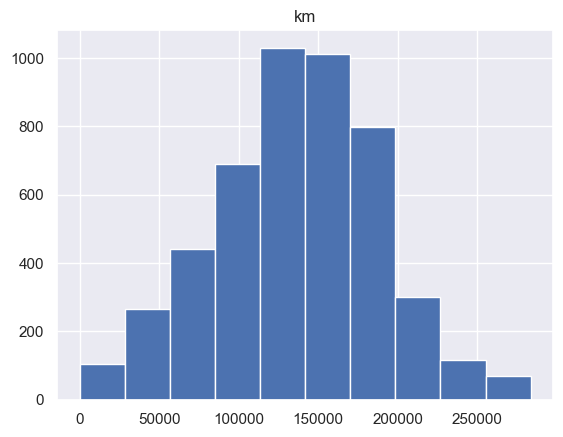

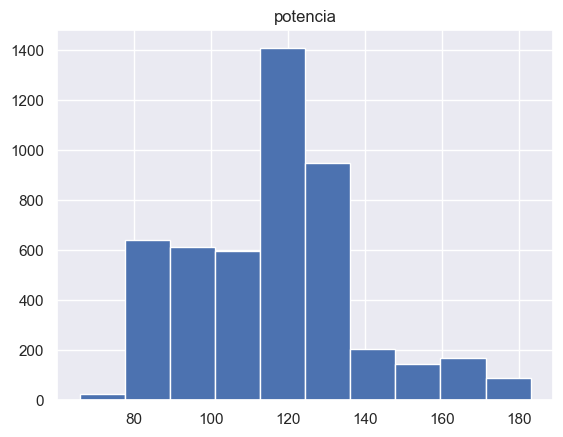

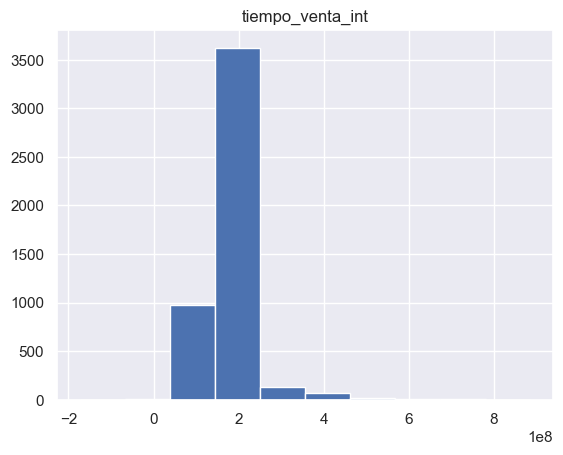

In [230]:
for i in lnum:
  print(bmw9.hist(i))

[[<Axes: title={'center': 'volante_regulable_int'}>]]
[[<Axes: title={'center': 'aire_acondicionado_int'}>]]
[[<Axes: title={'center': 'camara_trasera_int'}>]]
[[<Axes: title={'center': 'elevalunas_electrico_int'}>]]
[[<Axes: title={'center': 'bluetooth_int'}>]]
[[<Axes: title={'center': 'gps_int'}>]]
[[<Axes: title={'center': 'alerta_lim_velocidad_int'}>]]


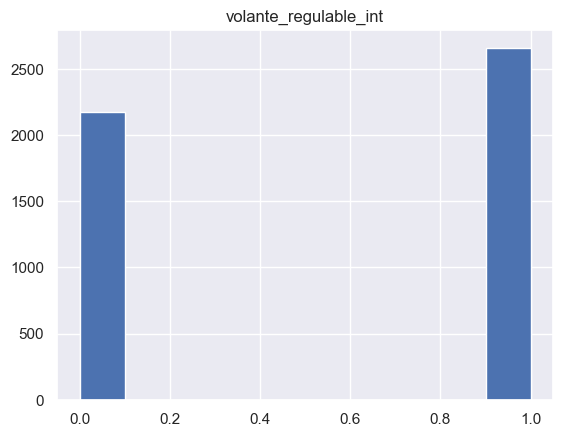

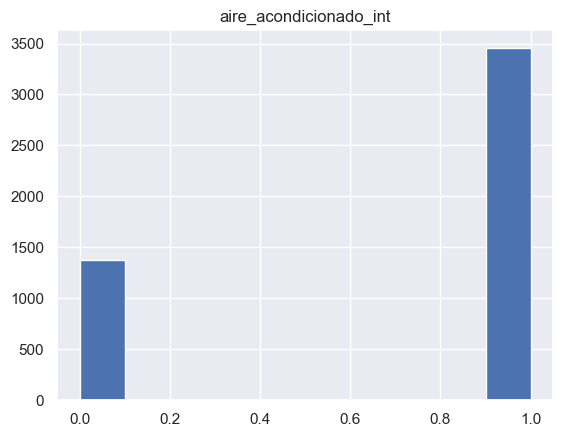

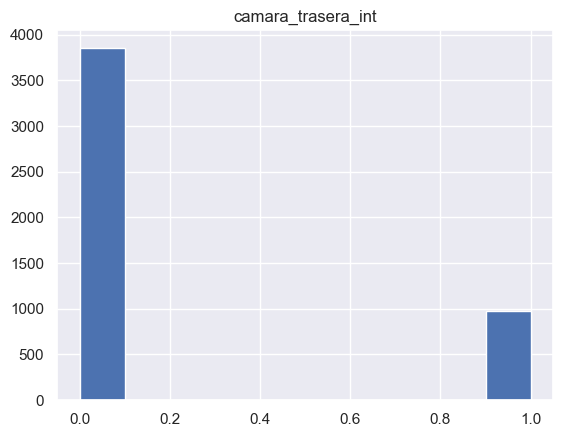

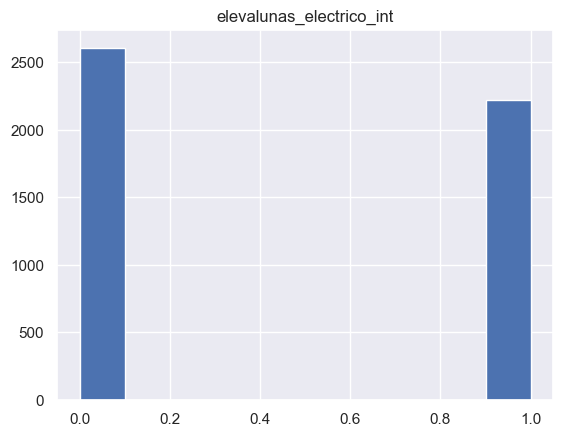

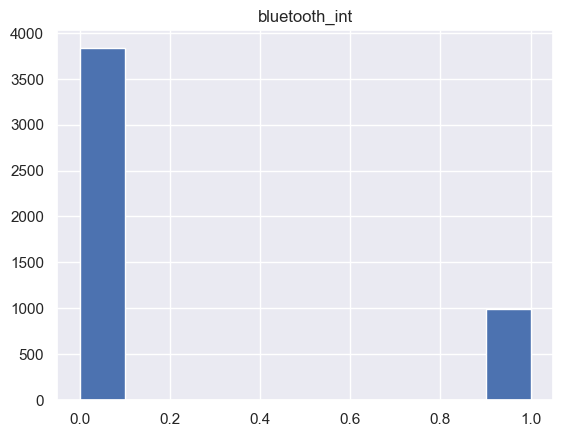

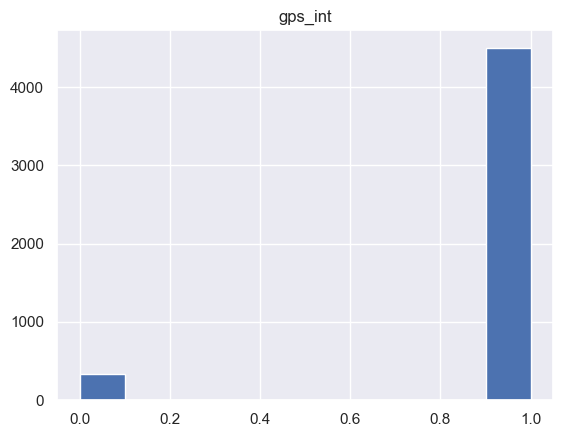

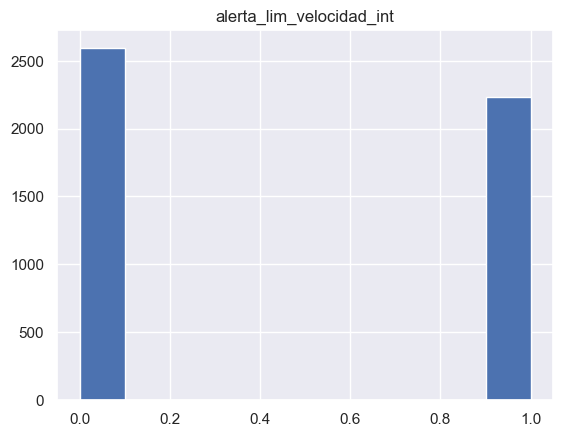

In [231]:
for i in lbool:
  print(bmw9.hist(i))

In [232]:
for i in lcat:
  print(bmw9[i].value_counts())

tipo_gasolina
diesel               4625
petrol                191
otro_gasolina          11
sin_tipo_gasolina       5
Name: count, dtype: int64
color
black         1494
grey          1068
otro_color     697
blue           647
white          483
sin_color      443
Name: count, dtype: int64
tipo_coche
sin_tipo_coche    1455
estate            1104
sedan              821
suv                754
hatchback          488
otro_coche         210
Name: count, dtype: int64


### TAREGT : NORMALIZAR EL PRECIO

In [233]:
bmw10 = bmw9.copy()

In [234]:
# Hacemos el logaritmo del precio
bmw10["log_precio"] = np.log10(bmw10["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

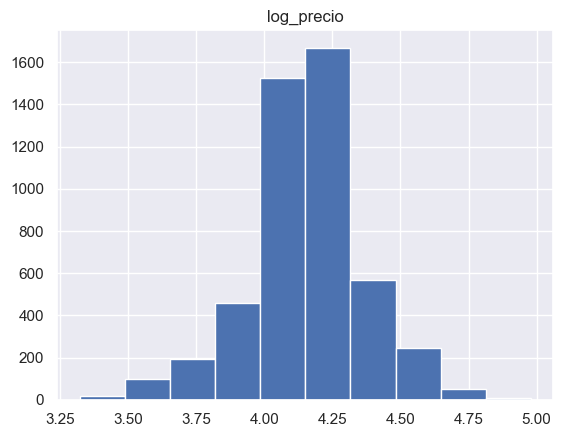

In [235]:
# Vemos el histograma del logaritmo del precio
bmw10.hist("log_precio")

<Axes: xlabel='precio'>

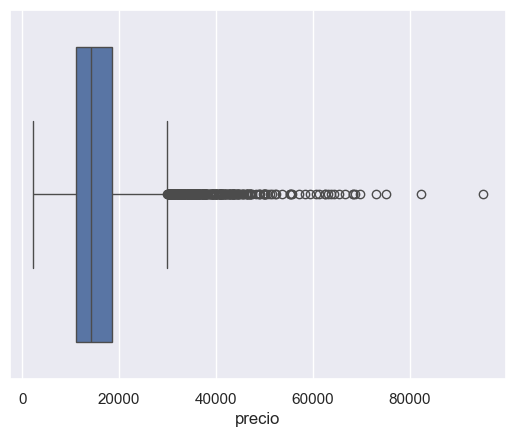

In [236]:
# Comparo el boxplot de precio con log_precio
sns.boxplot(x=bmw10["precio"])

<Axes: xlabel='log_precio'>

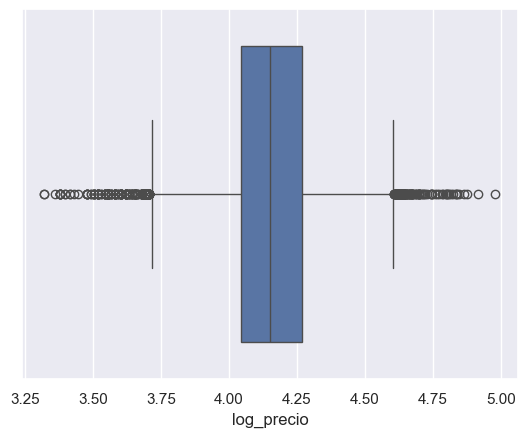

In [237]:
# Comparo el boxplot de precio con log_precio
sns.boxplot(x=bmw10["log_precio"])

In [238]:
# Actualizo mi target 
target = ["precio", "log_precio"]

### TARGET VS VARIABLES INDEPENDIENTES

In [239]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4832 non-null   float64
 1   potencia                  4832 non-null   float64
 2   tipo_gasolina             4832 non-null   object 
 3   color                     4832 non-null   object 
 4   tipo_coche                4832 non-null   object 
 5   precio                    4832 non-null   float64
 6   tiempo_venta_int          4832 non-null   float64
 7   volante_regulable_int     4832 non-null   int32  
 8   aire_acondicionado_int    4832 non-null   int32  
 9   camara_trasera_int        4832 non-null   int32  
 10  elevalunas_electrico_int  4832 non-null   int32  
 11  bluetooth_int             4832 non-null   int32  
 12  gps_int                   4832 non-null   int32  
 13  alerta_lim_velocidad_int  4832 non-null   int32  
 14  log_p

In [240]:
# # Análisis variable vs target, hay algún insight interesante?

<Axes: xlabel='potencia', ylabel='precio'>

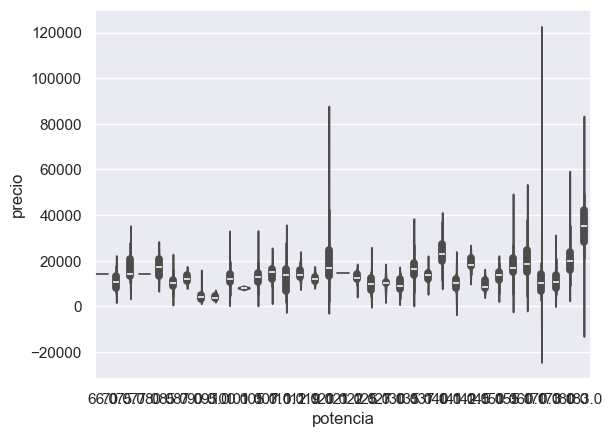

In [241]:
# Comparemos la potencia con el precio
# Con potencias de 120 o la máxima, gran rango de precio. Con potencias pequeñas, bajo rango de precio. 
sns.violinplot(x="potencia", y="precio", data=bmw9)

<Axes: xlabel='km', ylabel='precio'>

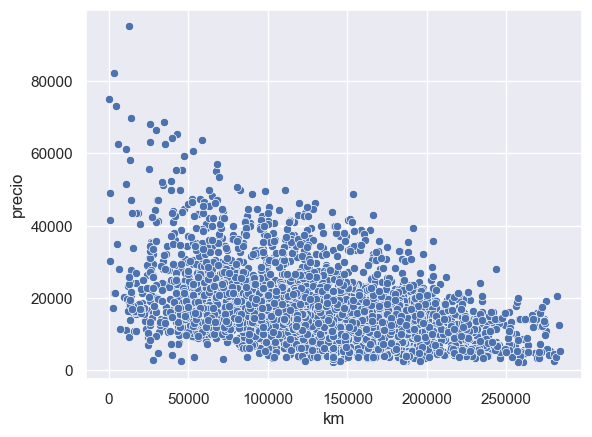

In [242]:
# Con muchos numeros, mejor aplicar un scatterplot
# De una manera genral, se puede ver que coches con más km tienden a tener menos precio, y viceversa, coches con menos km, tienen más precio). 
sns.scatterplot(x="km", y="precio", data=bmw10)

<Axes: xlabel='potencia', ylabel='precio'>

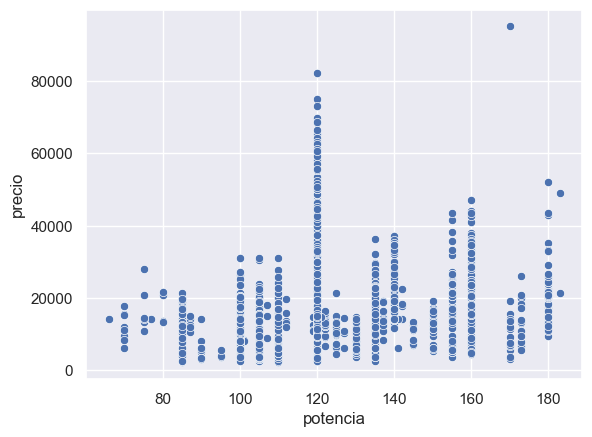

In [243]:
# Con muchos numeros, mejor aplicar un scatterplot
# Se puede ver que los coches de 120 de potencia hay todo un rango de precios. Los coches de muy baja o muy alta potencia, hay menos rango en el precio. 
sns.scatterplot(x="potencia", y="precio", data=bmw10)

<Axes: xlabel='km', ylabel='precio'>

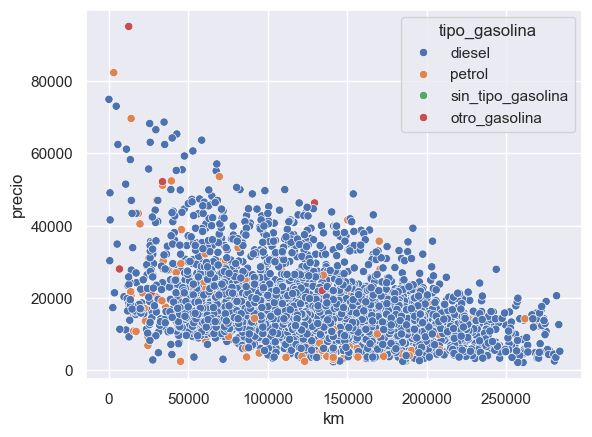

In [244]:
# Con muchos numeros, mejor aplicar un scatterplot
# Mucha variedad de precio de coches de diesel, seguido por coches de petroleo, que en general son de precios bajos cuando hay algo de kilometraje. 
# Poca variedad de coches sin tipo de gasolina, diesel o electro. 
sns.scatterplot(x="km", y="precio", hue="tipo_gasolina", data=bmw10)

<Axes: xlabel='km', ylabel='precio'>

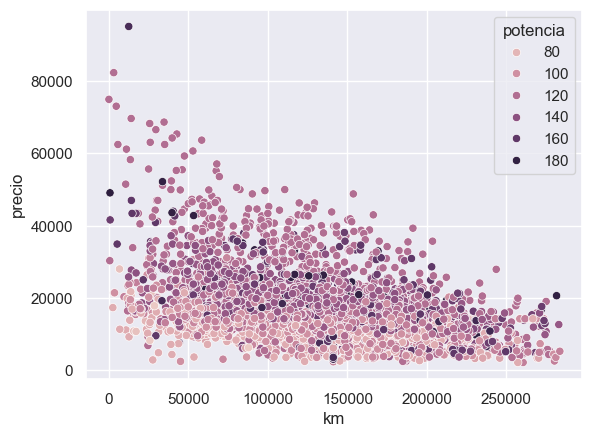

In [245]:
# Con muchos numeros, mejor aplicar un scatterplot
# Los de menos potencia, suelen ser de menos precio. De 120 de potencia, hay una gran variedad de precio y km. 
sns.scatterplot(x="km", y="precio", hue="potencia", data=bmw10)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


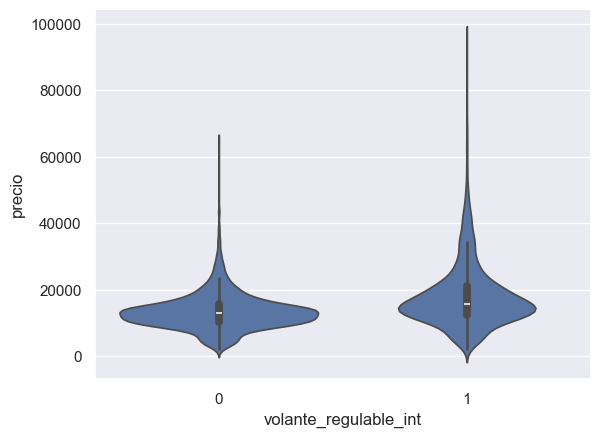

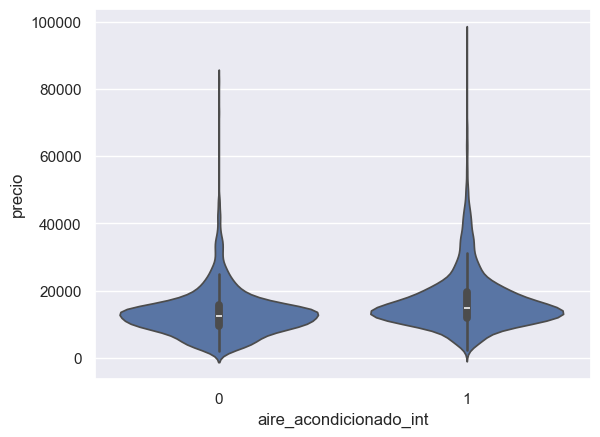

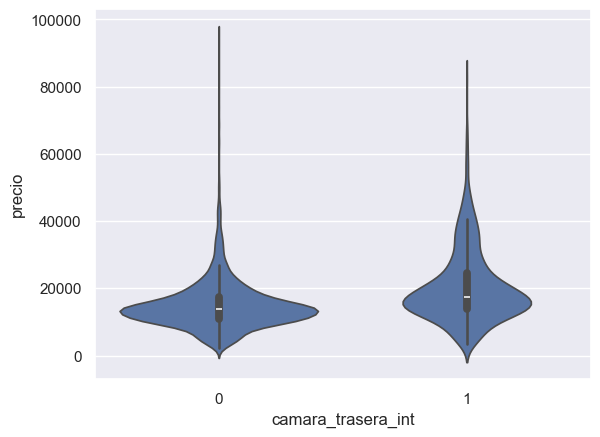

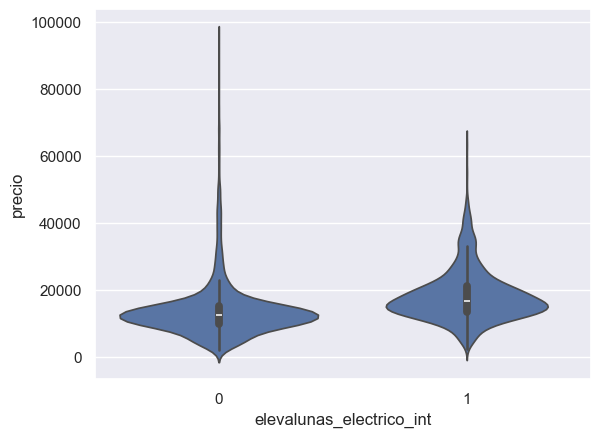

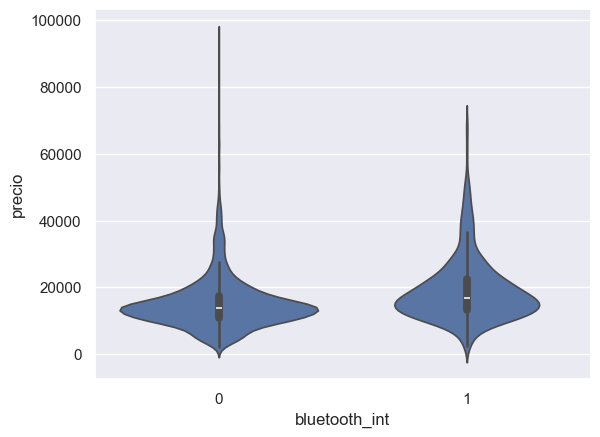

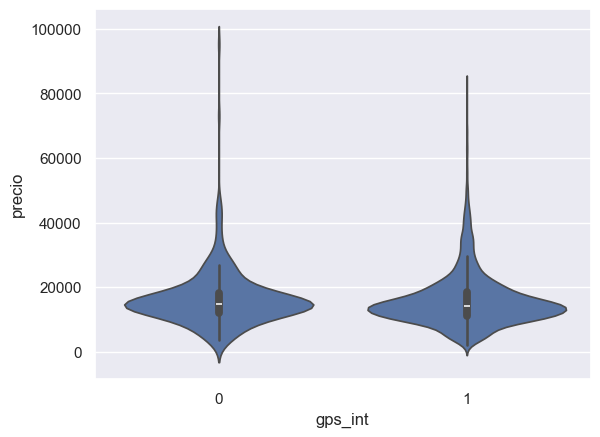

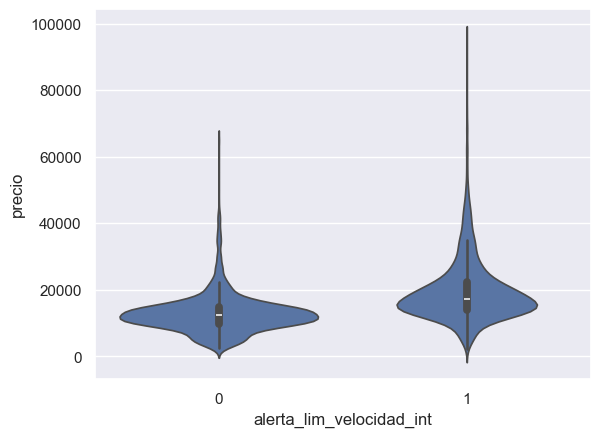

In [246]:
# Vamos a hacer un for para ver del violinplot de cada columna de lbool:
for i in lbool:
    plt.figure()
    n = sns.violinplot(x=i, y= "precio", data =bmw10)
    print(n)

### TRANSFORMAR CATEGORICAS A NUMERICAS

In [247]:
bmw11=bmw10.copy()

In [248]:
bmw11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4832 non-null   float64
 1   potencia                  4832 non-null   float64
 2   tipo_gasolina             4832 non-null   object 
 3   color                     4832 non-null   object 
 4   tipo_coche                4832 non-null   object 
 5   precio                    4832 non-null   float64
 6   tiempo_venta_int          4832 non-null   float64
 7   volante_regulable_int     4832 non-null   int32  
 8   aire_acondicionado_int    4832 non-null   int32  
 9   camara_trasera_int        4832 non-null   int32  
 10  elevalunas_electrico_int  4832 non-null   int32  
 11  bluetooth_int             4832 non-null   int32  
 12  gps_int                   4832 non-null   int32  
 13  alerta_lim_velocidad_int  4832 non-null   int32  
 14  log_p

In [249]:
lnum2, lbool2, lcat2 = obtener_lista_variables(bmw11)

In [250]:
lcat2

['tipo_gasolina', 'color', 'tipo_coche']

In [251]:
# Convierto las categoricas lcat a 1 y 0. Me daba true/false, por eso lo he multiplicado * 1 
bmw12 = pd.get_dummies(data=bmw11, columns=lcat2)*1

In [252]:
bmw11.shape

(4832, 15)

In [253]:
# Comparamos el tamaño del dataframe con el anterior, para comprobar nº de columnas
bmw12.shape

(4832, 28)

In [254]:
bmw12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   km                               4832 non-null   float64
 1   potencia                         4832 non-null   float64
 2   precio                           4832 non-null   float64
 3   tiempo_venta_int                 4832 non-null   float64
 4   volante_regulable_int            4832 non-null   int32  
 5   aire_acondicionado_int           4832 non-null   int32  
 6   camara_trasera_int               4832 non-null   int32  
 7   elevalunas_electrico_int         4832 non-null   int32  
 8   bluetooth_int                    4832 non-null   int32  
 9   gps_int                          4832 non-null   int32  
 10  alerta_lim_velocidad_int         4832 non-null   int32  
 11  log_precio                       4832 non-null   float64
 12  tipo_gasolina_die

### CORRELACION INTERMEDIA

In [255]:
corr2 = bmw12.corr(numeric_only=True)

In [256]:
corr2.style.background_gradient(cmap="coolwarm")

,km,potencia,precio,tiempo_venta_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,gps_int,alerta_lim_velocidad_int,log_precio,tipo_gasolina_diesel,tipo_gasolina_otro_gasolina,tipo_gasolina_petrol,tipo_gasolina_sin_tipo_gasolina,color_black,color_blue,color_grey,color_otro_color,color_sin_color,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_coche,tipo_coche_sedan,tipo_coche_sin_tipo_coche,tipo_coche_suv
km,1.000000,0.052635,-0.405411,0.290982,0.056236,0.043588,-0.006720,0.063542,-0.009703,0.164165,-0.022581,-0.402384,0.067856,-0.053511,-0.057154,-0.001683,0.040848,-0.036330,0.024797,0.005970,0.003466,-0.066323,0.139754,-0.102831,-0.089052,0.058099,-0.001838,-0.084074
potencia,0.052635,1.000000,0.327823,-0.004396,0.255435,0.134066,0.176972,0.371201,0.106523,-0.056632,0.407473,0.374233,-0.023861,0.000526,0.025150,-0.002916,0.040635,-0.028865,0.018982,-0.035777,-0.008481,-0.006032,0.042521,-0.217735,-0.079545,0.031870,-0.011300,0.157591
precio,-0.405411,0.327823,1.000000,-0.267981,0.274827,0.193031,0.260320,0.261018,0.191993,-0.015837,0.393784,0.916141,-0.007974,0.095970,-0.012727,-0.014901,0.024244,-0.022951,-0.023637,-0.024754,-0.006459,0.056611,-0.165816,-0.105044,0.000963,0.020010,-0.015147,0.276960
tiempo_venta_int,0.290982,-0.004396,-0.267981,1.000000,0.043113,-0.134060,0.017589,-0.066124,-0.047608,0.058366,-0.087370,-0.330289,-0.148346,-0.013462,0.158666,-0.007307,0.020406,-0.002713,0.020255,0.013390,0.003826,-0.075748,-0.018592,-0.042062,0.007644,0.075940,-0.006891,-0.017737
volante_regulable_int,0.056236,0.255435,0.274827,0.043113,1.000000,0.259233,0.253784,0.278911,0.125573,0.243938,0.187356,0.255092,0.010087,0.016994,-0.010900,-0.022663,0.025085,0.012170,0.050421,0.004083,-0.025630,-0.102345,0.002457,-0.116722,-0.031750,0.057838,-0.023281,0.081486
aire_acondicionado_int,0.043588,0.134066,0.193031,-0.134060,0.259233,1.000000,0.103447,0.232325,0.091531,0.298619,0.161768,0.235581,0.081875,0.010857,-0.084028,-0.022520,0.028614,0.001316,0.021770,0.000255,-0.036614,-0.040772,0.069853,-0.047556,-0.086145,0.046976,-0.019266,-0.017189
camara_trasera_int,-0.006720,0.176972,0.260320,0.017589,0.253784,0.103447,1.000000,0.199378,0.126535,0.061994,0.166815,0.234365,-0.008117,-0.013216,0.014340,-0.016192,0.020335,0.000476,0.015253,-0.021692,-0.031224,0.002475,-0.035597,-0.033478,-0.023808,-0.013494,0.004617,0.090485
elevalunas_electrico_int,0.063542,0.371201,0.261018,-0.066124,0.278911,0.232325,0.199378,1.000000,0.233687,0.202982,0.292170,0.329739,0.002614,-0.017973,0.006584,-0.029721,0.077593,-0.033886,-0.016574,-0.051769,-0.011363,0.013417,0.043384,-0.071118,-0.031882,0.012297,-0.006051,0.021694
bluetooth_int,-0.009703,0.106523,0.191993,-0.047608,0.125573,0.091531,0.126535,0.233687,1.000000,0.114945,0.089362,0.197858,-0.023811,-0.013566,0.030767,-0.016379,0.020679,0.007373,-0.032945,-0.036986,-0.016199,0.064250,-0.017201,0.026528,0.039676,-0.009392,-0.015972,0.005493
gps_int,0.164165,-0.056632,-0.015837,0.058366,0.243938,0.298619,0.061994,0.202982,0.114945,1.000000,-0.068014,-0.020233,0.056674,-0.004373,-0.046594,-0.068084,0.050583,0.007052,0.024779,0.007758,-0.014052,-0.115791,0.054752,0.000344,-0.003006,0.038842,-0.000419,-0.101609


### NORMALIZAR VARIABLES NUMERICAS 

In [257]:
bmw13=bmw12.copy()

In [258]:
# Minmaxscaler 
minMaxResultado_km = MinMaxScaler()

In [259]:
minMaxResultado_potencia = MinMaxScaler()

In [260]:
minMaxResultado_tiempo_venta_int = MinMaxScaler()

In [261]:
lnum2

['km', 'potencia', 'tiempo_venta_int']

In [262]:
# # Minmaxscaler km
bmw13[lnum2]= minMaxResultado_km.fit_transform(bmw13[lnum2])

In [263]:
# # Minmaxscaler potencia
bmw13[lnum2]= minMaxResultado_potencia.fit_transform(bmw13[lnum2])

In [264]:
# # Minmaxscaler tiempo_venta_int
bmw13[lnum2]= minMaxResultado_tiempo_venta_int.fit_transform(bmw13[lnum2])

In [265]:
bmw13.head()

,km,potencia,precio,tiempo_venta_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,gps_int,...,color_grey,color_otro_color,color_sin_color,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_coche,tipo_coche_sedan,tipo_coche_sin_tipo_coche,tipo_coche_suv
0_118,0.495195,0.290598,11300.0,0.339936,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1_M4,0.049327,0.461538,69700.0,0.307818,1,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
2_320,0.646375,0.461538,10200.0,0.337572,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3_420,0.451568,0.589744,25100.0,0.307818,1,1,0,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4_425,0.342507,0.803419,33400.0,0.307818,1,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0


In [266]:
bmw13.value_counts()

km        potencia  precio   tiempo_venta_int  volante_regulable_int  aire_acondicionado_int  camara_trasera_int  elevalunas_electrico_int  bluetooth_int  gps_int  alerta_lim_velocidad_int  log_precio  tipo_gasolina_diesel  tipo_gasolina_otro_gasolina  tipo_gasolina_petrol  tipo_gasolina_sin_tipo_gasolina  color_black  color_blue  color_grey  color_otro_color  color_sin_color  color_white  tipo_coche_estate  tipo_coche_hatchback  tipo_coche_otro_coche  tipo_coche_sedan  tipo_coche_sin_tipo_coche  tipo_coche_suv
0.497554  0.205128  3200.0   0.307818          1                      0                       0                   0                         0              1        0                         3.505150    1                     0                            0                     0                                0            0           0           1                 0                0            1                  0                     0                      0                 0       

In [267]:
# Eliinamos la columna precio
del bmw13["precio"]

CORRELACION FINAL

In [268]:
# Análisis de correlación final, hay alguna variable correlacionada?

In [269]:
corr2 = bmw13.corr(numeric_only=True)

In [270]:
corr2.style.background_gradient(cmap="coolwarm")

,km,potencia,tiempo_venta_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,gps_int,alerta_lim_velocidad_int,log_precio,tipo_gasolina_diesel,tipo_gasolina_otro_gasolina,tipo_gasolina_petrol,tipo_gasolina_sin_tipo_gasolina,color_black,color_blue,color_grey,color_otro_color,color_sin_color,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_coche,tipo_coche_sedan,tipo_coche_sin_tipo_coche,tipo_coche_suv
km,1.000000,0.052635,0.290982,0.056236,0.043588,-0.006720,0.063542,-0.009703,0.164165,-0.022581,-0.402384,0.067856,-0.053511,-0.057154,-0.001683,0.040848,-0.036330,0.024797,0.005970,0.003466,-0.066323,0.139754,-0.102831,-0.089052,0.058099,-0.001838,-0.084074
potencia,0.052635,1.000000,-0.004396,0.255435,0.134066,0.176972,0.371201,0.106523,-0.056632,0.407473,0.374233,-0.023861,0.000526,0.025150,-0.002916,0.040635,-0.028865,0.018982,-0.035777,-0.008481,-0.006032,0.042521,-0.217735,-0.079545,0.031870,-0.011300,0.157591
tiempo_venta_int,0.290982,-0.004396,1.000000,0.043113,-0.134060,0.017589,-0.066124,-0.047608,0.058366,-0.087370,-0.330289,-0.148346,-0.013462,0.158666,-0.007307,0.020406,-0.002713,0.020255,0.013390,0.003826,-0.075748,-0.018592,-0.042062,0.007644,0.075940,-0.006891,-0.017737
volante_regulable_int,0.056236,0.255435,0.043113,1.000000,0.259233,0.253784,0.278911,0.125573,0.243938,0.187356,0.255092,0.010087,0.016994,-0.010900,-0.022663,0.025085,0.012170,0.050421,0.004083,-0.025630,-0.102345,0.002457,-0.116722,-0.031750,0.057838,-0.023281,0.081486
aire_acondicionado_int,0.043588,0.134066,-0.134060,0.259233,1.000000,0.103447,0.232325,0.091531,0.298619,0.161768,0.235581,0.081875,0.010857,-0.084028,-0.022520,0.028614,0.001316,0.021770,0.000255,-0.036614,-0.040772,0.069853,-0.047556,-0.086145,0.046976,-0.019266,-0.017189
camara_trasera_int,-0.006720,0.176972,0.017589,0.253784,0.103447,1.000000,0.199378,0.126535,0.061994,0.166815,0.234365,-0.008117,-0.013216,0.014340,-0.016192,0.020335,0.000476,0.015253,-0.021692,-0.031224,0.002475,-0.035597,-0.033478,-0.023808,-0.013494,0.004617,0.090485
elevalunas_electrico_int,0.063542,0.371201,-0.066124,0.278911,0.232325,0.199378,1.000000,0.233687,0.202982,0.292170,0.329739,0.002614,-0.017973,0.006584,-0.029721,0.077593,-0.033886,-0.016574,-0.051769,-0.011363,0.013417,0.043384,-0.071118,-0.031882,0.012297,-0.006051,0.021694
bluetooth_int,-0.009703,0.106523,-0.047608,0.125573,0.091531,0.126535,0.233687,1.000000,0.114945,0.089362,0.197858,-0.023811,-0.013566,0.030767,-0.016379,0.020679,0.007373,-0.032945,-0.036986,-0.016199,0.064250,-0.017201,0.026528,0.039676,-0.009392,-0.015972,0.005493
gps_int,0.164165,-0.056632,0.058366,0.243938,0.298619,0.061994,0.202982,0.114945,1.000000,-0.068014,-0.020233,0.056674,-0.004373,-0.046594,-0.068084,0.050583,0.007052,0.024779,0.007758,-0.014052,-0.115791,0.054752,0.000344,-0.003006,0.038842,-0.000419,-0.101609
alerta_lim_velocidad_int,-0.022581,0.407473,-0.087370,0.187356,0.161768,0.166815,0.292170,0.089362,-0.068014,1.000000,0.423655,0.013915,0.025341,-0.022122,0.008859,0.044594,-0.009017,-0.012219,-0.030167,-0.027324,0.020055,-0.004819,-0.125104,-0.057360,0.016670,0.001539,0.122481


In [271]:
# Análisis de correlación final, hay alguna variable correlacionada?
# Correlacion entre precio y log_precio
# Correlacion tipo_gasolina_electrica y mi3, 0.7

In [272]:
bmw13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0_118 to 4842_525
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   km                               4832 non-null   float64
 1   potencia                         4832 non-null   float64
 2   tiempo_venta_int                 4832 non-null   float64
 3   volante_regulable_int            4832 non-null   int32  
 4   aire_acondicionado_int           4832 non-null   int32  
 5   camara_trasera_int               4832 non-null   int32  
 6   elevalunas_electrico_int         4832 non-null   int32  
 7   bluetooth_int                    4832 non-null   int32  
 8   gps_int                          4832 non-null   int32  
 9   alerta_lim_velocidad_int         4832 non-null   int32  
 10  log_precio                       4832 non-null   float64
 11  tipo_gasolina_diesel             4832 non-null   int32  
 12  tipo_gasolina_otr

In [273]:
columnas = bmw13.columns

In [274]:
print(columnas)

Index(['km', 'potencia', 'tiempo_venta_int', 'volante_regulable_int',
       'aire_acondicionado_int', 'camara_trasera_int',
       'elevalunas_electrico_int', 'bluetooth_int', 'gps_int',
       'alerta_lim_velocidad_int', 'log_precio', 'tipo_gasolina_diesel',
       'tipo_gasolina_otro_gasolina', 'tipo_gasolina_petrol',
       'tipo_gasolina_sin_tipo_gasolina', 'color_black', 'color_blue',
       'color_grey', 'color_otro_color', 'color_sin_color', 'color_white',
       'tipo_coche_estate', 'tipo_coche_hatchback', 'tipo_coche_otro_coche',
       'tipo_coche_sedan', 'tipo_coche_sin_tipo_coche', 'tipo_coche_suv'],
      dtype='object')


In [275]:
bmw13.head(5)

,km,potencia,tiempo_venta_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,gps_int,alerta_lim_velocidad_int,...,color_grey,color_otro_color,color_sin_color,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_coche,tipo_coche_sedan,tipo_coche_sin_tipo_coche,tipo_coche_suv
0_118,0.495195,0.290598,0.339936,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1_M4,0.049327,0.461538,0.307818,1,1,0,0,1,1,1,...,1,0,0,0,0,0,1,0,0,0
2_320,0.646375,0.461538,0.337572,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3_420,0.451568,0.589744,0.307818,1,1,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
4_425,0.342507,0.803419,0.307818,1,1,0,0,1,1,1,...,0,1,0,0,0,0,0,0,1,0


In [276]:
bmw13.head(5).T

,0_118,1_M4,2_320,3_420,4_425
km,0.495195,0.049327,0.646375,0.451568,0.342507
potencia,0.290598,0.461538,0.461538,0.589744,0.803419
tiempo_venta_int,0.339936,0.307818,0.337572,0.307818,0.307818
volante_regulable_int,1.000000,1.000000,0.000000,1.000000,1.000000
aire_acondicionado_int,1.000000,1.000000,0.000000,1.000000,1.000000
camara_trasera_int,0.000000,0.000000,0.000000,0.000000,0.000000
elevalunas_electrico_int,1.000000,0.000000,1.000000,1.000000,0.000000
bluetooth_int,0.000000,1.000000,0.000000,1.000000,1.000000
gps_int,1.000000,1.000000,1.000000,1.000000,1.000000
alerta_lim_velocidad_int,0.000000,1.000000,0.000000,0.000000,1.000000
